Copyright 2024 Zhixuan Hu

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [1]:
import numpy as np
import pandas as pd
import os, re, sys, json, time
sys.path.append(os.getcwd() + '\\..\\')

In [2]:
pattern = re.compile(r".*\.csv")
files = os.listdir('../../dataset/')
files = [file for file in files if pattern.match(file)]
files

['chatgpt_HC3_all.csv',
 'gpt_0125_00.csv',
 'human_00.csv',
 'human_01_01.csv',
 'human_01_02.csv',
 'human_02.csv',
 'human_cook_01.csv',
 'human_cook_02.csv',
 'human_HC3_all.csv',
 'human_modern_01.csv',
 'human_modern_02.csv',
 'human_travel_01.csv',
 'human_travel_02.csv',
 'human_travel_03.csv',
 'questions_00.csv',
 'questions_01_01.csv',
 'questions_01_02.csv',
 'questions_02.csv',
 'questions_cook_01.csv',
 'questions_cook_02.csv',
 'questions_HC3_all.csv',
 'questions_modern_01.csv',
 'questions_modern_02.csv',
 'questions_travel_01.csv',
 'questions_travel_02.csv',
 'questions_travel_03.csv',
 'test_gpt_0125.csv',
 'test_human.csv',
 'test_questions.csv']

In [3]:
file = '../../dataset/test_gpt_0125.csv'
df = pd.read_csv(file)
df.head(1)

Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  \
0             0             0             0             0             0   

   Unnamed: 0.1  Unnamed: 0  question_id  answer_id  \
0             0         0.0          454          1   

                                                text  \
0  深度学习是一种机器学习的方法，它通过模拟人类神经网络的结构和功能来实现对数据的学习和预测。在...   

                              text-embedding-3-small  \
0  [-0.03873550891876221, -0.03209991380572319, 0...   

               sentences_length[mean1,cv1,mean2,cv2]  \
0  [41.611111111111114, 0.25685931847790017, 14.3...   

               words_richness[ttr, yules_k, d_index]  \
0  [0.33986928104575165, 235.04729899706192, 0.08...   

                       emotion_Dou[eps, eiv]  
0  [-0.99242573436361, 0.013853045618768956]

In [4]:
model = 'emotion_coherence'
# 检查是否存在 'as' 列
if model not in df.columns:
    # 如果不存在，则创建一个空的字符串列
    df[model] = ''
df[model] = df[model].astype(str)

In [5]:
df_need = df[('"nan"' == df[model]) | (df[model]=='')]
# 防止过长超出token限制
tol = 1e20
mask = df_need['text'].str.len() > tol
df_need.loc[mask, 'text'] = df_need.loc[mask, 'text'].str.slice(0, tol) #截断
df_need_list = df_need['text'].to_list()
df_need.head(1)

Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  \
0             0             0             0             0             0   

   Unnamed: 0.1  Unnamed: 0  question_id  answer_id  \
0             0         0.0          454          1   

                                                text  \
0  深度学习是一种机器学习的方法，它通过模拟人类神经网络的结构和功能来实现对数据的学习和预测。在...   

                              text-embedding-3-small  \
0  [-0.03873550891876221, -0.03209991380572319, 0...   

               sentences_length[mean1,cv1,mean2,cv2]  \
0  [41.611111111111114, 0.25685931847790017, 14.3...   

               words_richness[ttr, yules_k, d_index]  \
0  [0.33986928104575165, 235.04729899706192, 0.08...   

                       emotion_Dou[eps, eiv] emotion_coherence  
0  [-0.99242573436361, 0.013853045618768956]

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  26.045
Date:                Wed, 05 Jun 2024   AIC                            -40.089
Time:                        15:41:52   BIC                            -34.747
Sample:                             0   HQIC                           -39.353
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8642     26.194      0.491      0.623     -38.474      64.203
ar.L1          1.9997      0.002   1006.350      0.000       1.996       2.004
ar.L2         -1.0000      0.002   -652.399      0

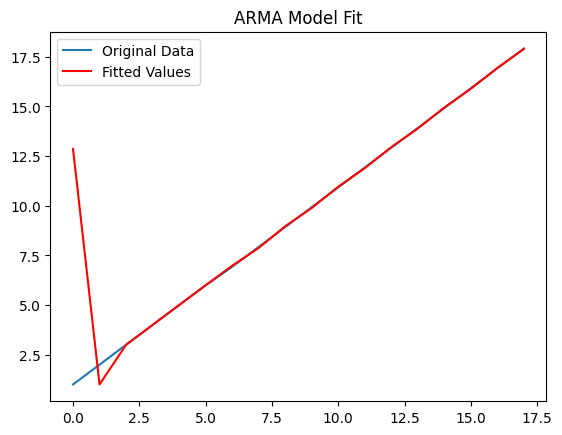

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D92BAC55D0> 7.87599361812017 0.7040230177306914


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  37.134
Date:                Wed, 05 Jun 2024   AIC                            -62.269
Time:                        15:41:52   BIC                            -58.434
Sample:                             0   HQIC                           -62.624
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0955     12.539      0.566      0.571     -17.480      31.671
ar.L1          1.9998      0.000   5095.172      0.000       1.999       2.001
ar.L2         -1.0000      0.000  -7114.813      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


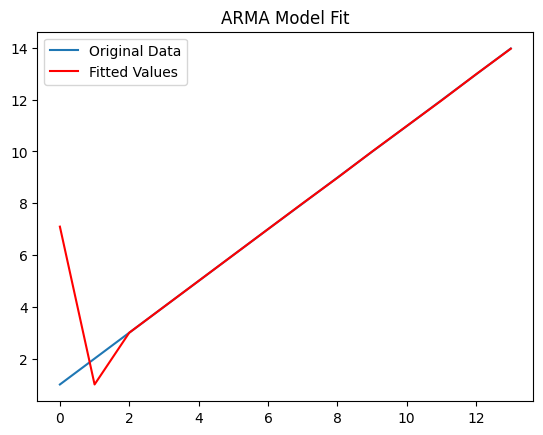

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D92BAC6950> 2.7263479978382046 0.8315533992297899
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  10.335
Date:                Wed, 05 Jun 2024   AIC                             -8.671
Time:                        15:41:53   BIC                            -11.014
Sample:                             0   HQIC                           -14.960
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0006      0.001   2577.735      0.000       2.998       3.003
ar.L1       

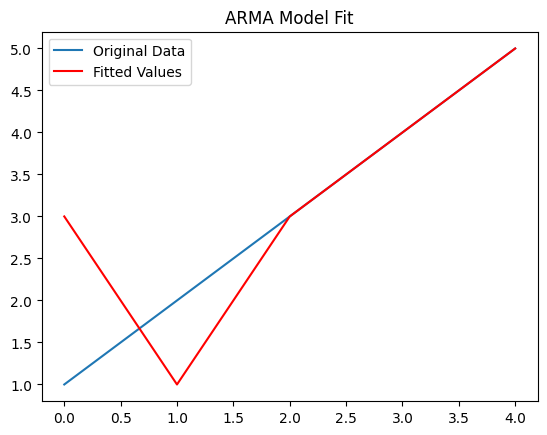

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D92BAC5450> 1.0004660566684338 0.4997652134077367


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   3.129
Date:                Wed, 05 Jun 2024   AIC                              5.742
Time:                        15:41:53   BIC                              8.129
Sample:                             0   HQIC                             4.237
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2826      2.583      2.820      0.005       2.220      12.345
ar.L1          1.9882      0.014    141.194      0.000       1.961       2.016
ar.L2         -0.9999      0.003   -363.365      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


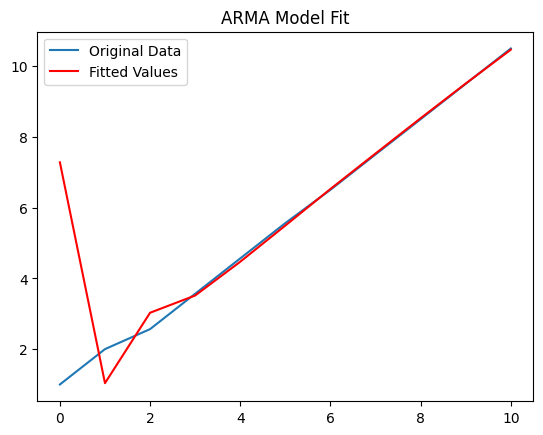

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9489391E0> 3.693773209759914 0.5962715031212991
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   7.168
Date:                Wed, 05 Jun 2024   AIC                             -2.335
Time:                        15:41:54   BIC                             -6.018
Sample:                             0   HQIC                           -10.416
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7567      0.916      1.919      0.055      -0.038       3.551
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


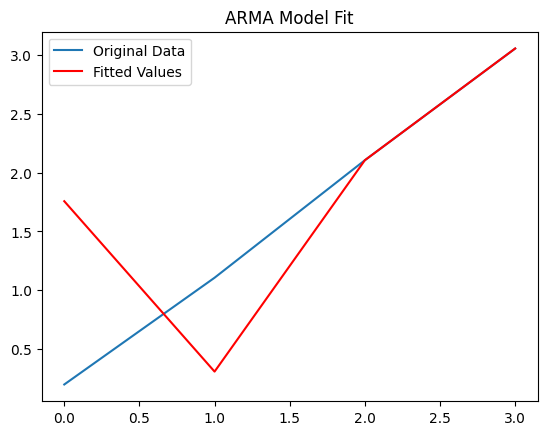

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D92BAC69B0> 0.7674925268555692 0.33050455412269
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -5.676
Date:                Wed, 05 Jun 2024   AIC                             23.352
Time:                        15:41:54   BIC                             27.600
Sample:                             0   HQIC                            23.307
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0174      0.285     24.600      0.000       6.458       7.577
ar.L1         

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


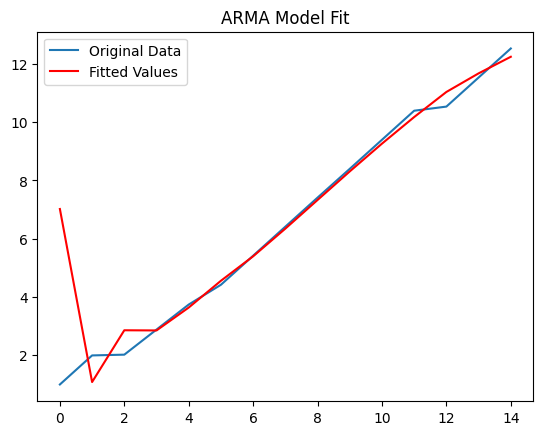

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9489D6710> 2.565026628567917 0.8112460722561379
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -0.934
Date:                Wed, 05 Jun 2024   AIC                             13.867
Time:                        15:41:54   BIC                             12.618
Sample:                             0   HQIC                             8.866
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3872      3.439      0.985      0.325      -3.354      10.128
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


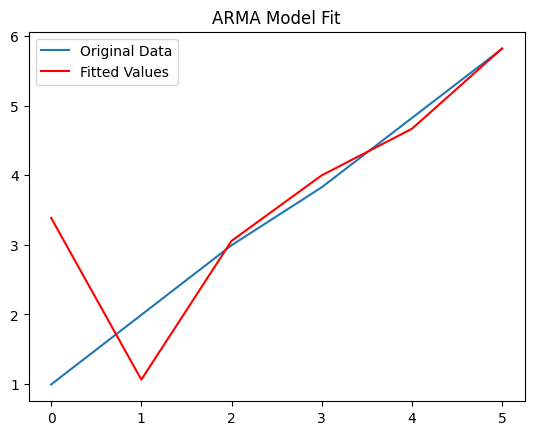

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948C053C0> 1.1090927096096916 0.5836277334317601
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   2.685
Date:                Wed, 05 Jun 2024   AIC                              6.630
Time:                        15:41:55   BIC                              6.306
Sample:                             0   HQIC                             2.619
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8612     11.159      0.256      0.798     -19.010      24.732
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


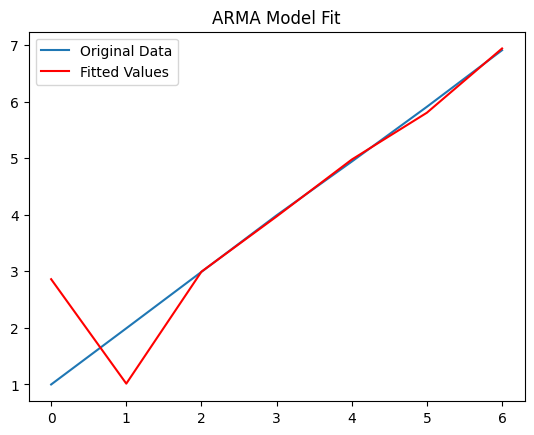

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948BC33D0> 0.6334445270861376 0.8359132829253392
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -1.614
Date:                Wed, 05 Jun 2024   AIC                             15.228
Time:                        15:41:55   BIC                             14.904
Sample:                             0   HQIC                            11.217
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4321      8.287      0.535      0.593     -11.810      20.674
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


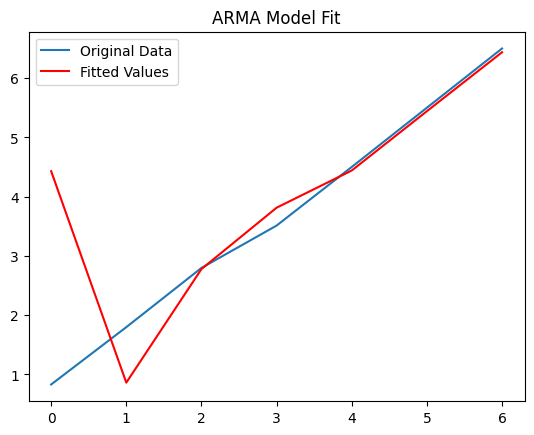

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948C5AFE0> 1.9920073781063155 0.4287014618102001
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   9.892
Date:                Wed, 05 Jun 2024   AIC                             -7.783
Time:                        15:41:56   BIC                             -3.535
Sample:                             0   HQIC                            -7.829
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4590     13.604      1.210      0.226     -10.204      43.122
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


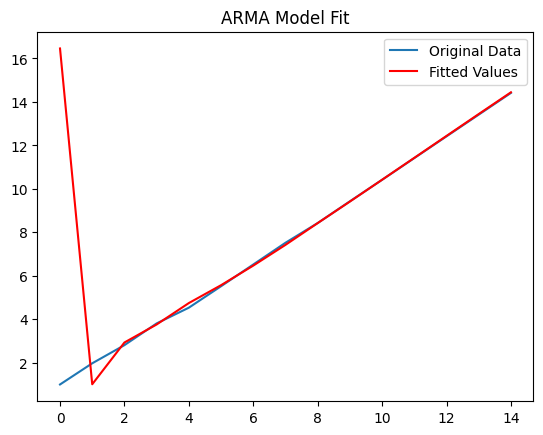

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948D0F910> 16.000092674129675 0.06759825565392164
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   8.884
Date:                Wed, 05 Jun 2024   AIC                             -5.769
Time:                        15:41:56   BIC                             -9.451
Sample:                             0   HQIC                           -13.849
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9554      1.449      1.350      0.177      -0.884       4.795
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


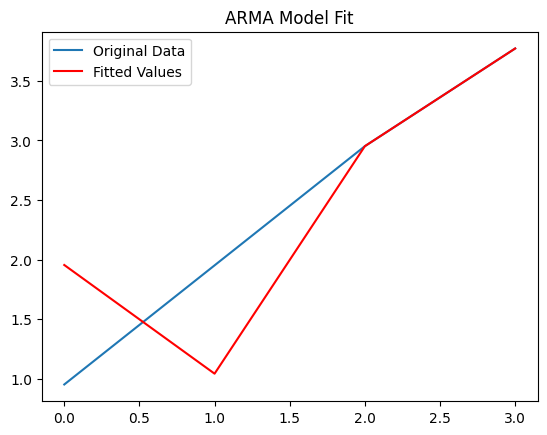

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948E9B460> 0.45777663954607717 0.5914637261005045
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  21.340
Date:                Wed, 05 Jun 2024   AIC                            -30.680
Time:                        15:41:57   BIC                            -24.706
Sample:                             0   HQIC                           -29.514
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1007      9.972      1.314      0.189      -6.444      32.646
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


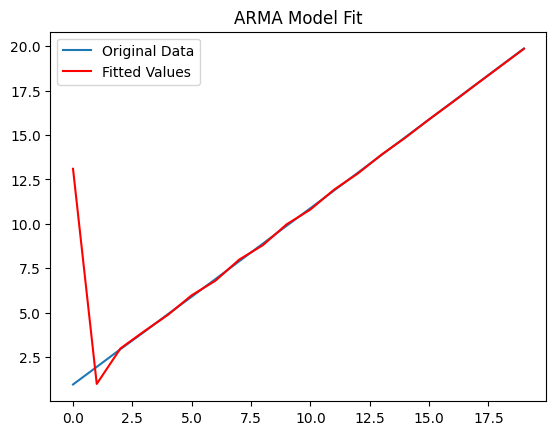

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948F122F0> 7.427238290658385 0.7750015401755594
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -7.519
Date:                Wed, 05 Jun 2024   AIC                             27.038
Time:                        15:41:57   BIC                             28.222
Sample:                             0   HQIC                            24.485
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9536     17.898      0.165      0.869     -32.127      38.034
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


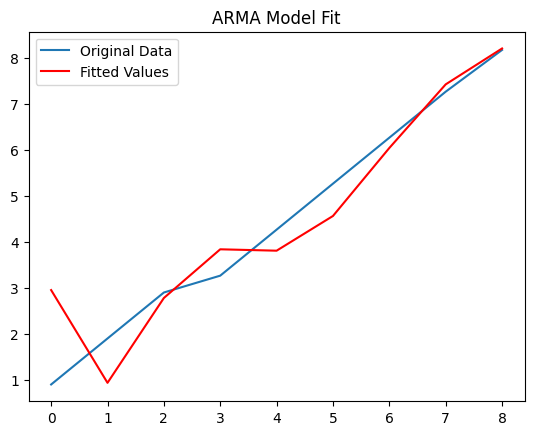

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948F74040> 0.6958313787634594 0.8713583750191729


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -19.140
Date:                Wed, 05 Jun 2024   AIC                             50.280
Time:                        15:41:58   BIC                             56.827
Sample:                             0   HQIC                            51.822
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7118      9.545      1.122      0.262      -7.995      29.419
ar.L1          0.4390      0.583      0.753      0.452      -0.704       1.582
ar.L2          0.5492      0.543      1.012      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


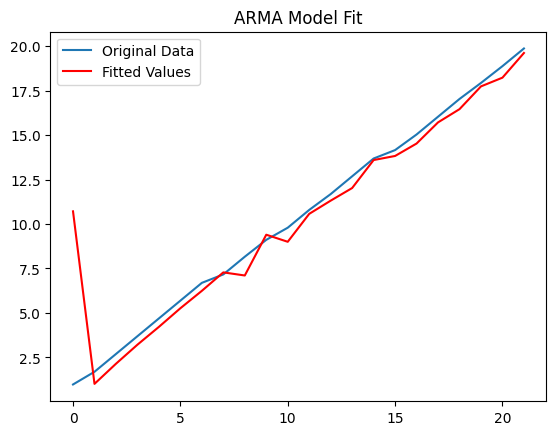

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948CAFE20> 4.55130164409885 0.8573989299714929
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  16.235
Date:                Wed, 05 Jun 2024   AIC                            -20.470
Time:                        15:41:58   BIC                            -13.923
Sample:                             0   HQIC                           -18.927
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1616      5.686      1.259      0.208      -3.984      18.307
ar.L1         

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


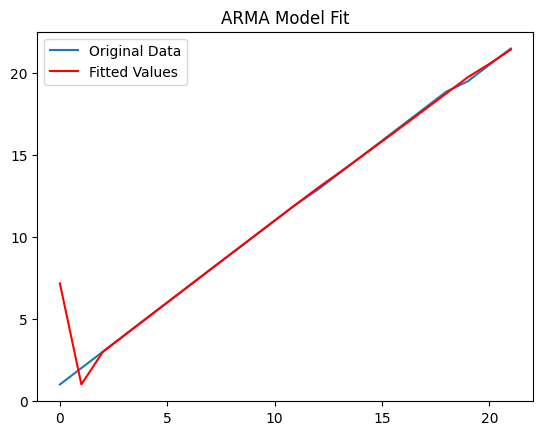

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9490113F0> 1.7794045669221215 0.9539532142685806
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  57.472
Date:                Wed, 05 Jun 2024   AIC                           -102.944
Time:                        15:41:59   BIC                            -98.695
Sample:                             0   HQIC                          -102.989
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1704     11.588      0.705      0.481     -14.542      30.883
ar.L1       

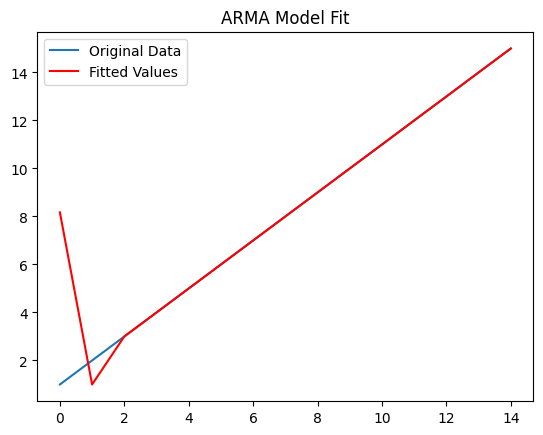

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948EBC8E0> 3.494287285518804 0.8127047911702744


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  44.112
Date:                Wed, 05 Jun 2024   AIC                            -76.224
Time:                        15:42:00   BIC                            -71.976
Sample:                             0   HQIC                           -76.269
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9942      8.522      0.938      0.348      -8.709      24.698
ar.L1          1.9993      0.001   2143.125      0.000       1.997       2.001
ar.L2         -0.9998      0.000  -2257.772      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


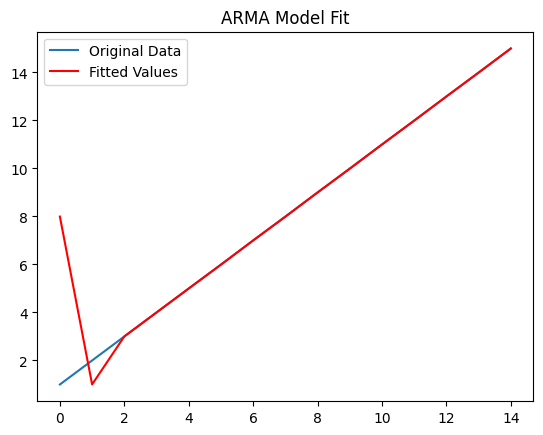

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949093B50> 3.3276597483472687 0.8216093055014072
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   17
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   9.633
Date:                Wed, 05 Jun 2024   AIC                             -7.266
Time:                        15:42:00   BIC                             -2.267
Sample:                             0   HQIC                            -6.769
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0232      5.014      1.401      0.161      -2.803      16.849
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


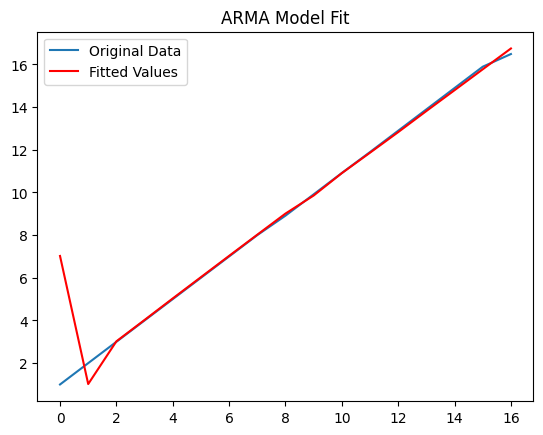

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94910AE30> 2.1976038652933734 0.905225758595135
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  22.829
Date:                Wed, 05 Jun 2024   AIC                            -33.658
Time:                        15:42:01   BIC                            -30.748
Sample:                             0   HQIC                           -34.735
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8291      5.109      1.532      0.125      -2.185      17.843
ar.L1        

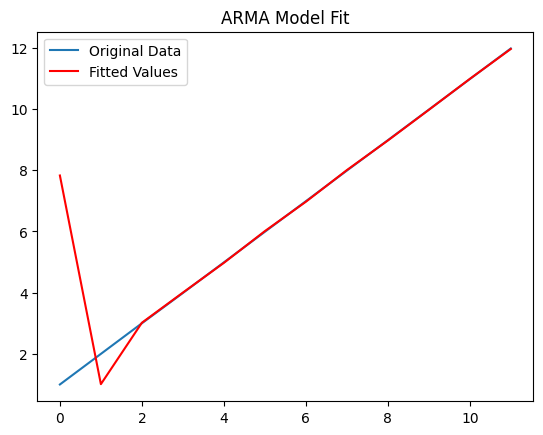

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94912D120> 3.9686939795105314 0.6656454230155562


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -2.934
Date:                Wed, 05 Jun 2024   AIC                             17.868
Time:                        15:42:01   BIC                             17.544
Sample:                             0   HQIC                            13.857
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0097      3.467      1.445      0.148      -1.785      11.805
ar.L1          1.8169      0.486      3.735      0.000       0.863       2.770
ar.L2         -0.8762      0.531     -1.650      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


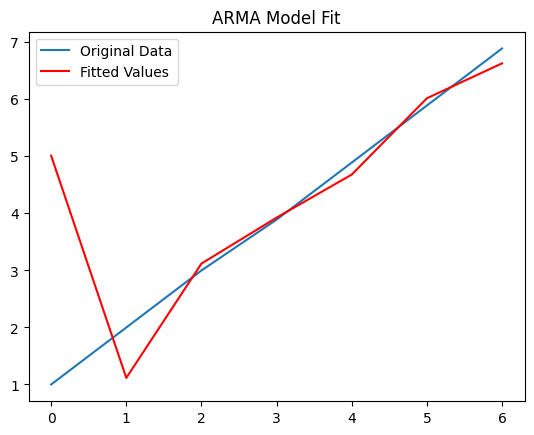

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9491DC880> 2.428945842273283 0.3631366875621421
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  19.155
Date:                Wed, 05 Jun 2024   AIC                            -26.309
Time:                        15:42:02   BIC                            -25.126
Sample:                             0   HQIC                           -28.863
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9953     35.790      0.140      0.889     -65.153      75.143
ar.L1        

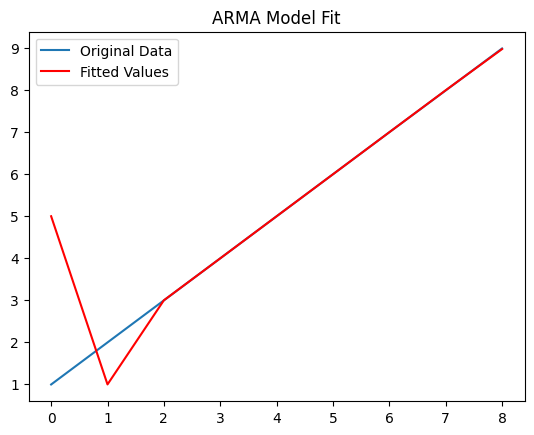

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94922FF10> 1.8897121623421853 0.7160178028232931


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   0.917
Date:                Wed, 05 Jun 2024   AIC                             10.165
Time:                        15:42:02   BIC                              7.822
Sample:                             0   HQIC                             3.876
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7139      2.779      0.617      0.537      -3.732       7.160
ar.L1          1.9907      0.019    104.978      0.000       1.954       2.028
ar.L2         -0.9994      0.006   -177.688      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


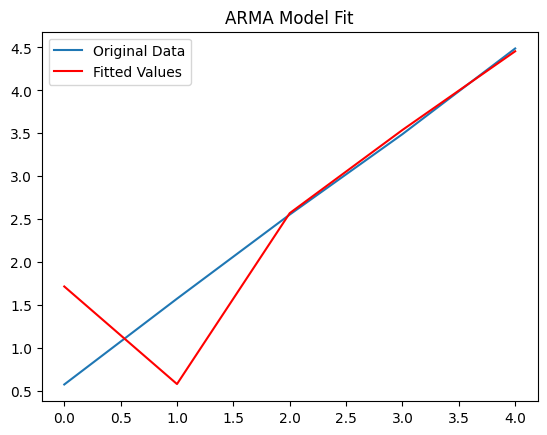

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948F3CDF0> 0.4597582597678104 0.7582967922679258
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  30.165
Date:                Wed, 05 Jun 2024   AIC                            -48.330
Time:                        15:42:02   BIC                            -47.146
Sample:                             0   HQIC                           -50.883
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7490      0.001   5739.609      0.000       4.747       4.751
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


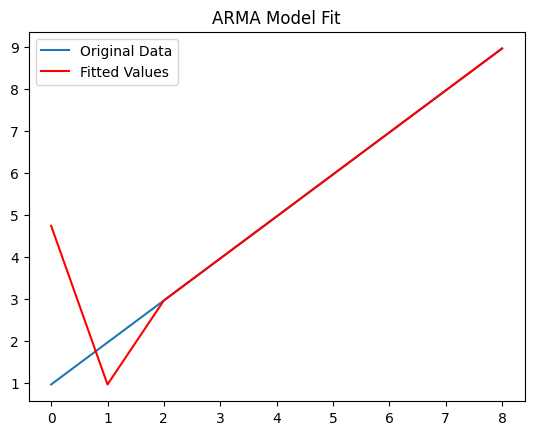

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94922FAC0> 1.6971346045355264 0.7453546469532335
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   7.205
Date:                Wed, 05 Jun 2024   AIC                             -2.410
Time:                        15:42:03   BIC                             -4.754
Sample:                             0   HQIC                            -8.700
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8186   1.25e-07   4.66e+07      0.000       5.819       5.819
ar.L1       

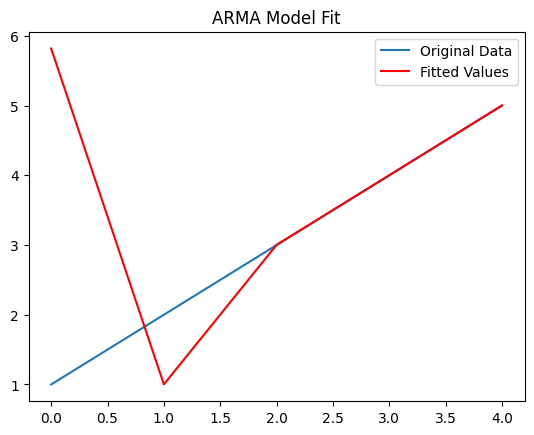

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94922E2F0> 4.843233703644405 -1.422141178104419


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   3.943
Date:                Wed, 05 Jun 2024   AIC                              4.115
Time:                        15:42:03   BIC                             -1.294
Sample:                             0   HQIC                            -6.757
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9046      0.504      3.777      0.000       0.916       2.893
ar.L1          1.1894      0.341      3.488      0.000       0.521       1.858
ar.L2         -1.0000      0.000  -7899.044      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


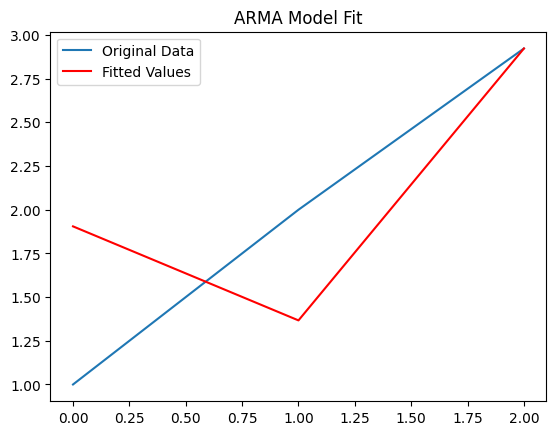

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948E4A590> 0.40636484306783954 0.3405173545590152
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -0.118
Date:                Wed, 05 Jun 2024   AIC                             12.236
Time:                        15:42:04   BIC                             15.145
Sample:                             0   HQIC                            11.159
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0547     29.094      0.174      0.862     -51.969      62.078
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


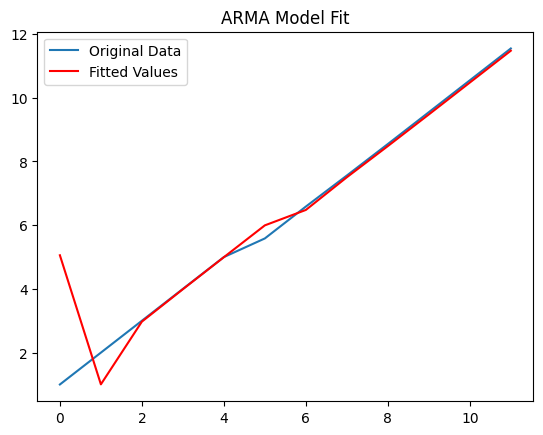

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9493EFE80> 1.4695098773342379 0.8618649876829583
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  21.939
Date:                Wed, 05 Jun 2024   AIC                            -31.877
Time:                        15:42:04   BIC                            -26.211
Sample:                             0   HQIC                           -30.918
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8930      6.275      1.258      0.208      -4.406      20.192
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


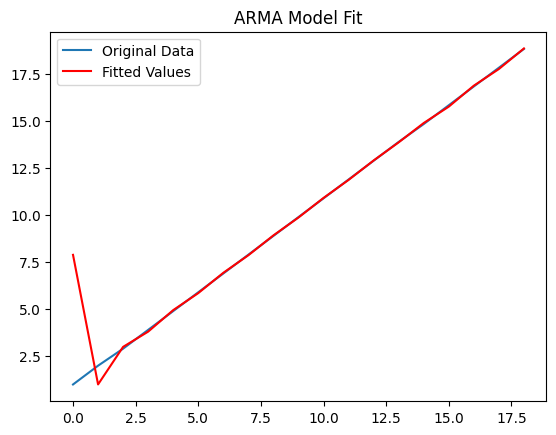

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948F3CC40> 2.558306436519695 0.9136913655902315
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  23.904
Date:                Wed, 05 Jun 2024   AIC                            -35.808
Time:                        15:42:05   BIC                            -35.332
Sample:                             0   HQIC                           -39.023
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4769      0.001   3750.842      0.000       4.475       4.479
ar.L1        

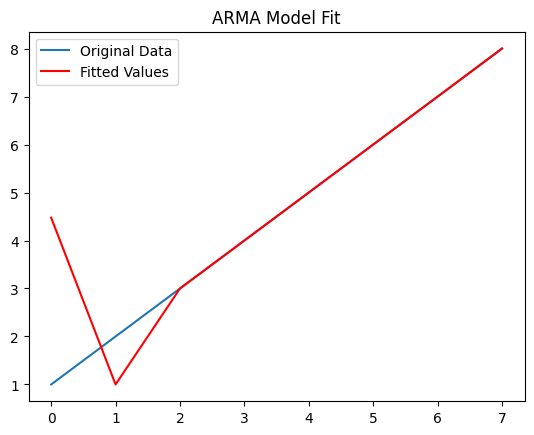

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9494C4E80> 1.6360728143683478 0.6882856327991576


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  44.186
Date:                Wed, 05 Jun 2024   AIC                            -76.373
Time:                        15:42:05   BIC                            -72.983
Sample:                             0   HQIC                           -77.069
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9979      0.007   1075.331      0.000       6.985       7.011
ar.L1          1.9993      0.001   3124.660      0.000       1.998       2.001
ar.L2         -0.9996      0.000  -2156.244      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


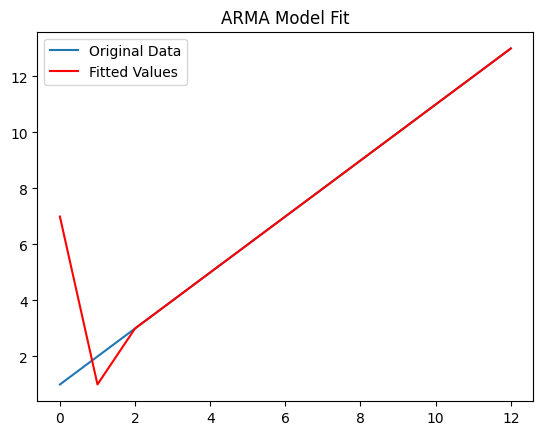

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9494C4280> 2.8440667746241277 0.7968354600274348
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  18.219
Date:                Wed, 05 Jun 2024   AIC                            -24.437
Time:                        15:42:06   BIC                            -24.762
Sample:                             0   HQIC                           -28.449
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6606      0.002   2877.459      0.000       4.657       4.664
ar.L1       

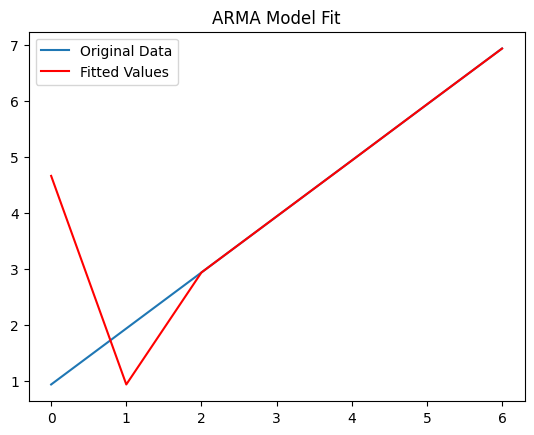

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9494C4E80> 2.1244271914497626 0.46870257858823194


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -5.541
Date:                Wed, 05 Jun 2024   AIC                             23.082
Time:                        15:42:06   BIC                             26.916
Sample:                             0   HQIC                            22.727
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3072      5.378      1.359      0.174      -3.234      17.848
ar.L1          1.5569      0.338      4.609      0.000       0.895       2.219
ar.L2         -0.5803      0.348     -1.668      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


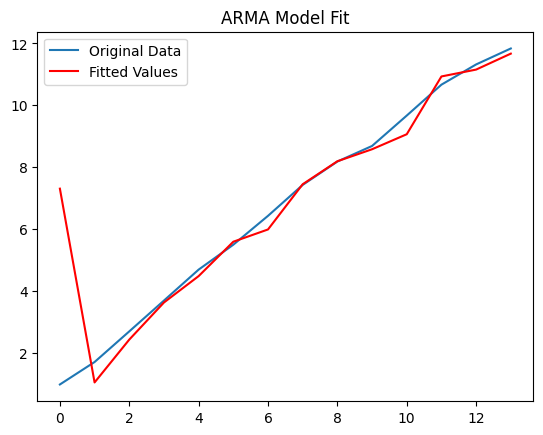

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9495DF640> 2.94806463189745 0.7531506890848263


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   3.124
Date:                Wed, 05 Jun 2024   AIC                              5.752
Time:                        15:42:07   BIC                              0.344
Sample:                             0   HQIC                            -5.119
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0452      0.099     10.504      0.000       0.850       1.240
ar.L1         -1.9259      0.124    -15.477      0.000      -2.170      -1.682
ar.L2         -1.0000   6.27e-05   -1.6e+04      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


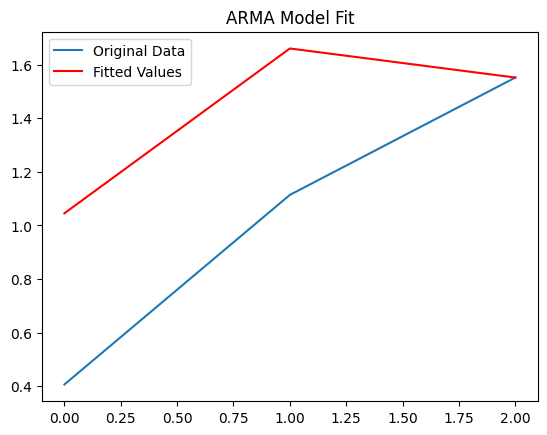

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949662800> 0.2353671255983407 -0.057955211921268956
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   4.353
Date:                Wed, 05 Jun 2024   AIC                              3.293
Time:                        15:42:07   BIC                             -2.115
Sample:                             0   HQIC                            -7.578
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9506      0.478      4.083      0.000       1.014       2.887
ar.L1    

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


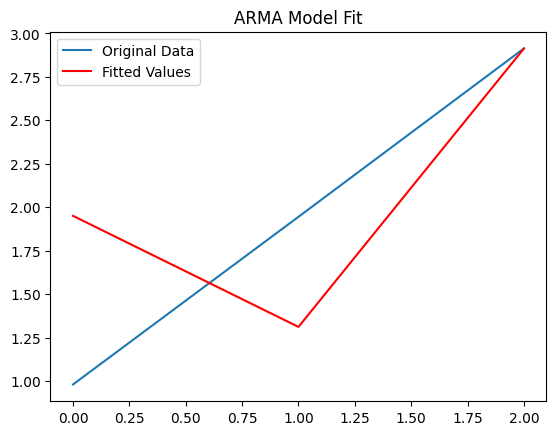

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949477280> 0.4469478101021631 0.2815925998870561


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  16.991
Date:                Wed, 05 Jun 2024   AIC                            -21.981
Time:                        15:42:08   BIC                            -23.231
Sample:                             0   HQIC                           -26.983
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3749   2.89e-13   1.17e+13      0.000       3.375       3.375
ar.L1          2.0000    1.4e-05   1.43e+05      0.000       2.000       2.000
ar.L2         -1.0000   5.67e-06  -1.77e+05      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


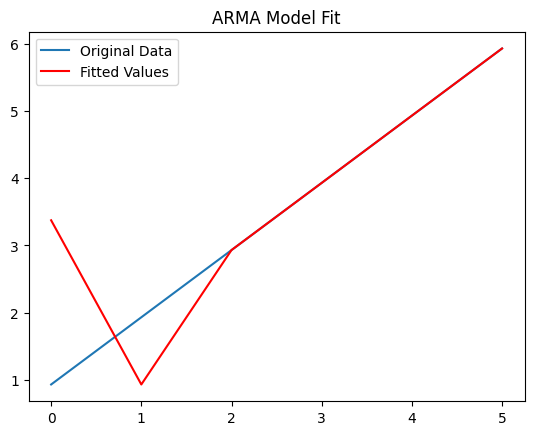

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949505210> 1.1616079832385109 0.6016532309151427
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   7.891
Date:                Wed, 05 Jun 2024   AIC                             -3.781
Time:                        15:42:08   BIC                             -5.031
Sample:                             0   HQIC                            -8.783
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3104     17.388      0.190      0.849     -30.769      37.390
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


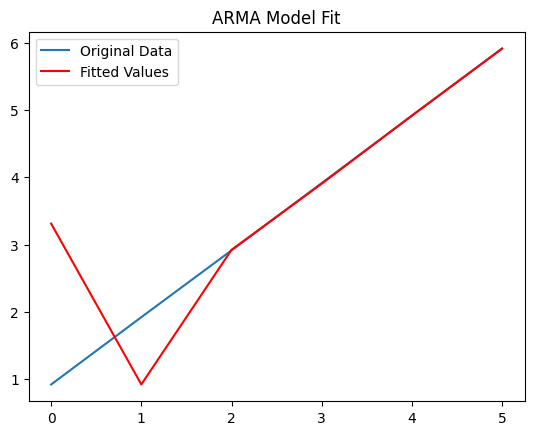

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949505900> 1.1185184117398608 0.6150923389798126
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -3.865
Date:                Wed, 05 Jun 2024   AIC                             19.730
Time:                        15:42:09   BIC                             18.481
Sample:                             0   HQIC                            14.729
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1438      5.659      0.379      0.705      -8.947      13.234
ar.L1       

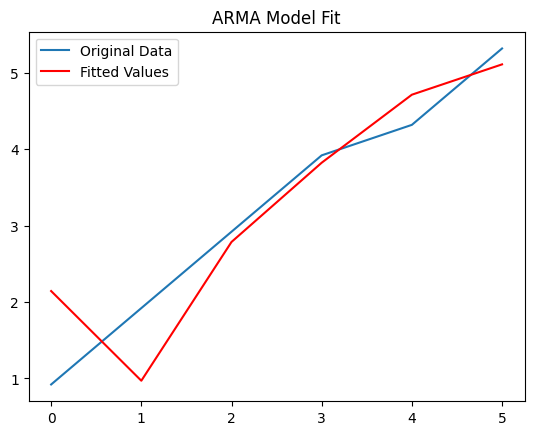

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948E4AF80> 0.43780211004740516 0.8006056646741491


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   6.176
Date:                Wed, 05 Jun 2024   AIC                             -0.351
Time:                        15:42:09   BIC                             -2.695
Sample:                             0   HQIC                            -6.641
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0942     15.791      0.133      0.894     -28.857      33.045
ar.L1          1.9993      0.001   1444.350      0.000       1.997       2.002
ar.L2         -0.9998      0.001  -1249.086      0

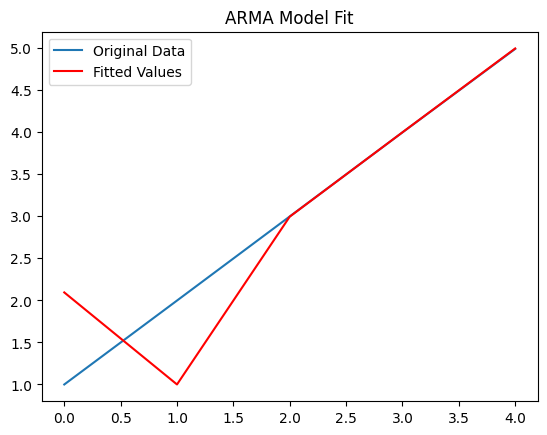

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9494EA800> 0.4386638084841983 0.7797965484358896


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -3.705
Date:                Wed, 05 Jun 2024   AIC                             19.410
Time:                        15:42:10   BIC                             18.160
Sample:                             0   HQIC                            14.408
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3194      5.723      0.405      0.685      -8.898      13.537
ar.L1          1.9207      0.441      4.357      0.000       1.057       2.785
ar.L2         -0.9983      0.287     -3.480      0

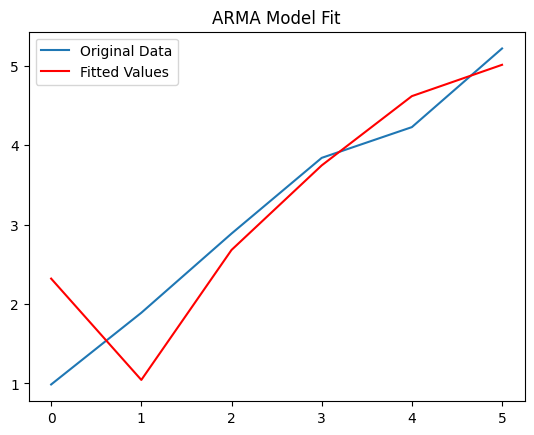

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949506A70> 0.455918041700306 0.7763278625681819


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -6.174
Date:                Wed, 05 Jun 2024   AIC                             24.349
Time:                        15:42:10   BIC                             23.099
Sample:                             0   HQIC                            19.347
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7886      1.842      1.514      0.130      -0.821       6.398
ar.L1          1.4040      2.355      0.596      0.551      -3.211       6.019
ar.L2         -0.7181      0.608     -1.182      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


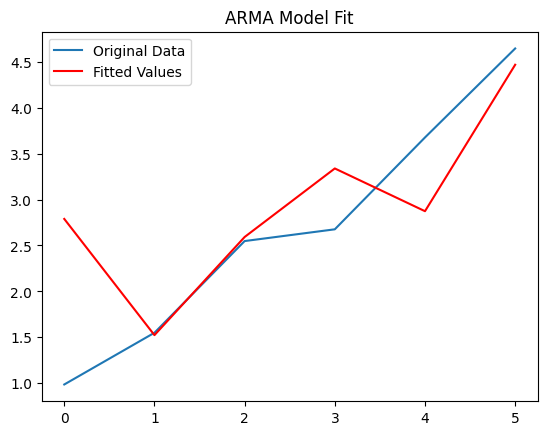

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949255BA0> 0.7270943194911966 0.5156705020172455
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -1.583
Date:                Wed, 05 Jun 2024   AIC                             15.165
Time:                        15:42:10   BIC                             19.801
Sample:                             0   HQIC                            15.403
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4204     33.361      0.312      0.755     -54.967      75.808
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


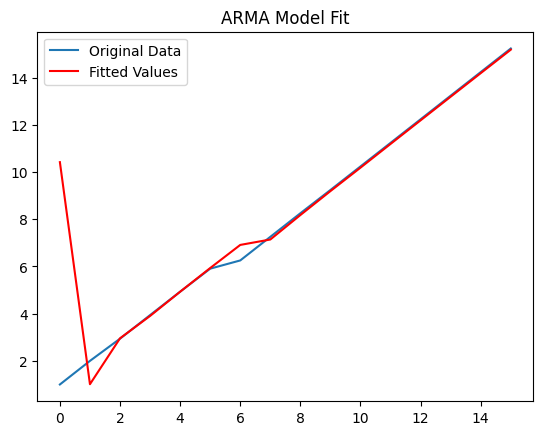

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94917A620> 5.638316019879716 0.6975936144378313
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  20.945
Date:                Wed, 05 Jun 2024   AIC                            -29.889
Time:                        15:42:11   BIC                            -30.214
Sample:                             0   HQIC                           -33.901
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2263      0.020    209.081      0.000       4.187       4.266
ar.L1        

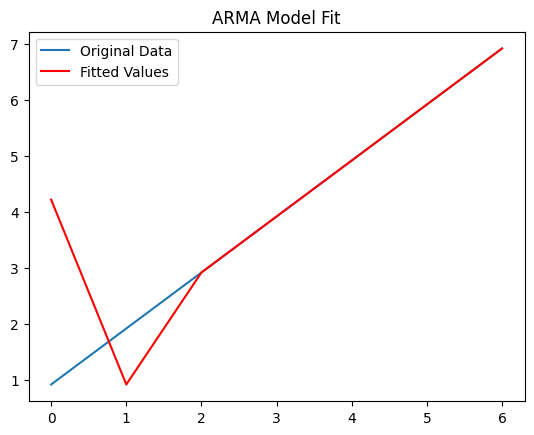

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9490BD450> 1.6994528750691134 0.5750334865536071


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   4.721
Date:                Wed, 05 Jun 2024   AIC                              2.558
Time:                        15:42:11   BIC                             -2.850
Sample:                             0   HQIC                            -8.313
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9376      0.925      2.094      0.036       0.124       3.751
ar.L1          0.8960      1.106      0.810      0.418      -1.271       3.063
ar.L2         -1.0000      0.000  -6574.324      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


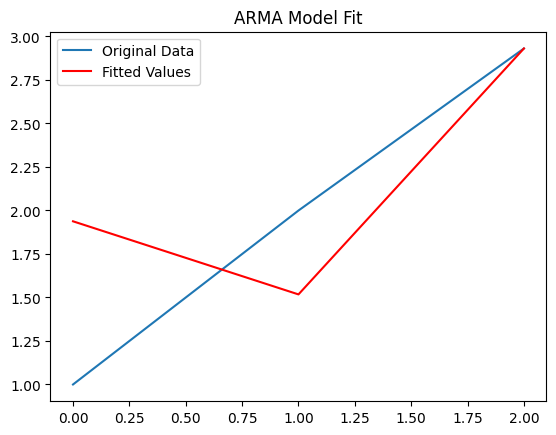

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948FC3490> 0.3708073131304312 0.40392461923471856
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    2
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   4.200
Date:                Wed, 05 Jun 2024   AIC                              3.599
Time:                        15:42:12   BIC                             -4.242
Sample:                             0   HQIC                           -12.799
                                  - 2                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4988    1.3e-07   1.15e+07      0.000       1.499       1.499
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


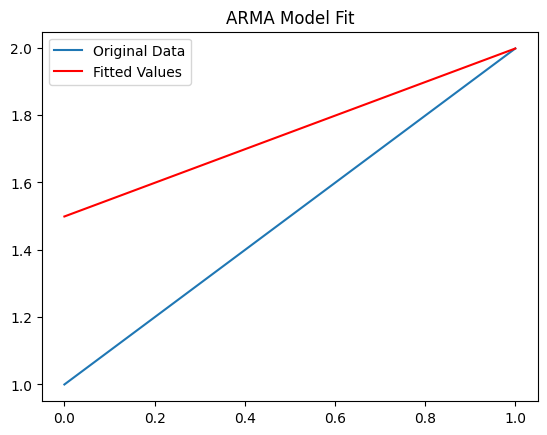

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948FC3010> 0.12451722734866141 0.5000147854974725
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -8.805
Date:                Wed, 05 Jun 2024   AIC                             29.610
Time:                        15:42:12   BIC                             33.000
Sample:                             0   HQIC                            28.914
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9958      4.674      1.497      0.134      -2.164      16.156
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


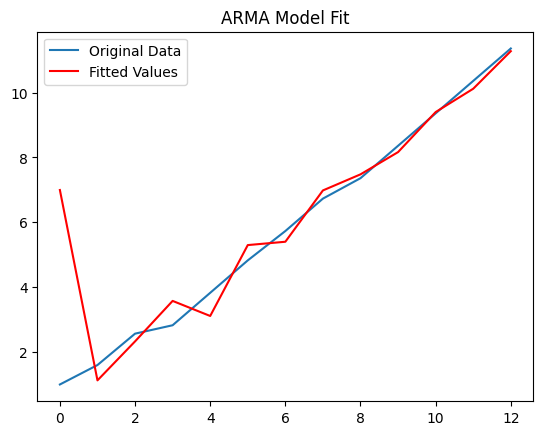

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949059120> 2.909019932815709 0.7280249315136347
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    2
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   4.258
Date:                Wed, 05 Jun 2024   AIC                              3.484
Time:                        15:42:13   BIC                             -4.357
Sample:                             0   HQIC                           -12.914
                                  - 2                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4726   4.67e-08   3.16e+07      0.000       1.473       1.473
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


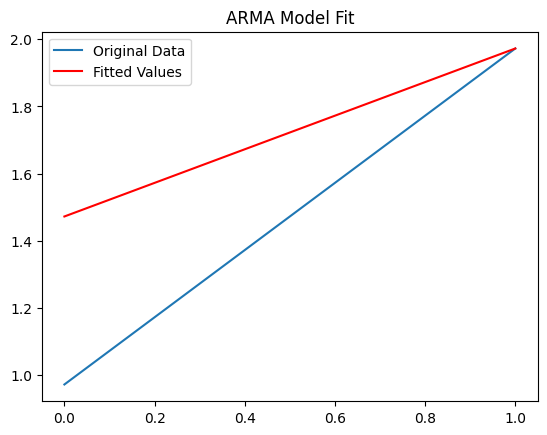

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948F75030> 0.12499787549164955 0.5000061599556596


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   0.142
Date:                Wed, 05 Jun 2024   AIC                             11.716
Time:                        15:42:13   BIC                             15.550
Sample:                             0   HQIC                            11.361
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3740     18.917      0.284      0.776     -31.704      42.452
ar.L1          1.9970      0.013    152.133      0.000       1.971       2.023
ar.L2         -0.9998      0.008   -121.131      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


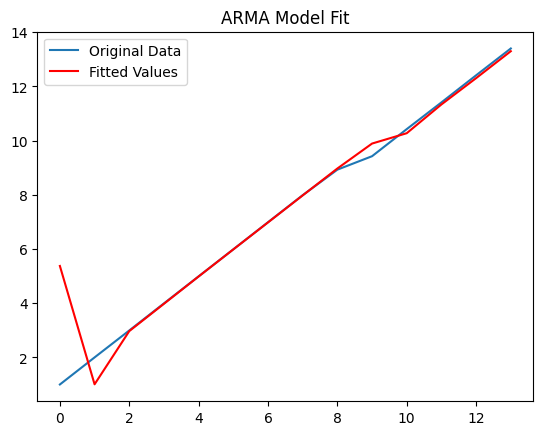

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948EEF220> 1.4562741515450277 0.8991024336113057
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  27.562
Date:                Wed, 05 Jun 2024   AIC                            -43.123
Time:                        15:42:14   BIC                            -37.781
Sample:                             0   HQIC                           -42.387
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9309     10.919      0.726      0.468     -13.469      29.331
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


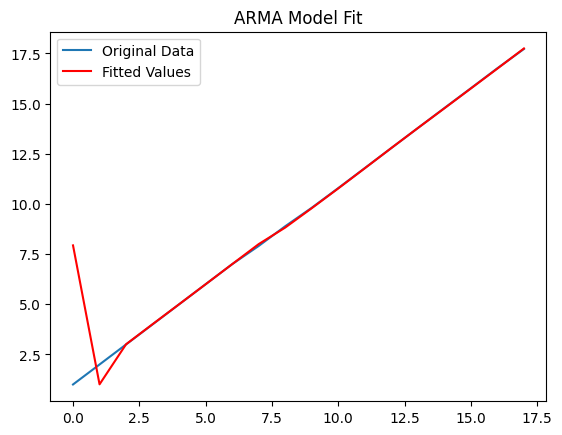

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948F63370> 2.7240721578304816 0.8947652443605314
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   2.297
Date:                Wed, 05 Jun 2024   AIC                              7.406
Time:                        15:42:14   BIC                              1.998
Sample:                             0   HQIC                            -3.465
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9302      0.618      3.123      0.002       0.719       3.142
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


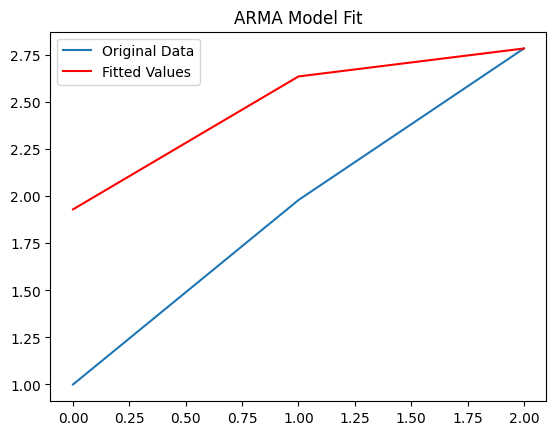

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948D22E00> 0.43219795451366005 0.18882090075658542
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -5.610
Date:                Wed, 05 Jun 2024   AIC                             23.221
Time:                        15:42:14   BIC                             22.896
Sample:                             0   HQIC                            19.209
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9670      2.000      1.483      0.138      -0.953       6.887
ar.L1     

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


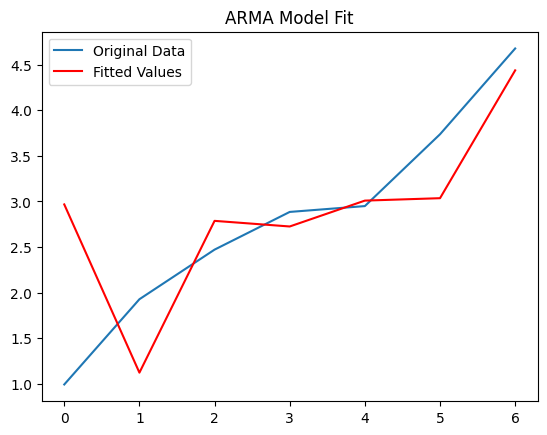

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948F76140> 0.7464581759284135 0.39011505763726373
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -5.606
Date:                Wed, 05 Jun 2024   AIC                             23.212
Time:                        15:42:15   BIC                             24.395
Sample:                             0   HQIC                            20.658
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2050      3.132      1.342      0.179      -1.935      10.345
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


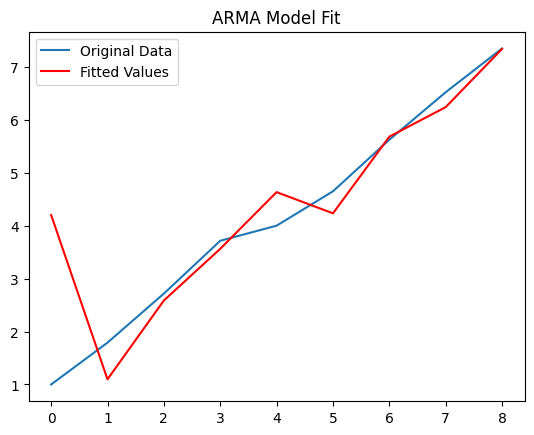

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949058100> 1.2742476085268608 0.6827491210190272
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -7.757
Date:                Wed, 05 Jun 2024   AIC                             27.514
Time:                        15:42:16   BIC                             29.902
Sample:                             0   HQIC                            26.009
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0283     16.332      0.247      0.805     -27.982      36.039
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


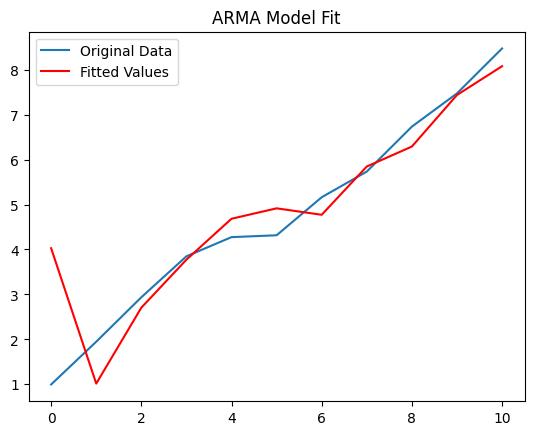

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948D20910> 1.0151945553775206 0.788462570866716
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  11.983
Date:                Wed, 05 Jun 2024   AIC                            -11.965
Time:                        15:42:16   BIC                            -11.489
Sample:                             0   HQIC                           -15.180
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5420      6.626      0.535      0.593      -9.444      16.528
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


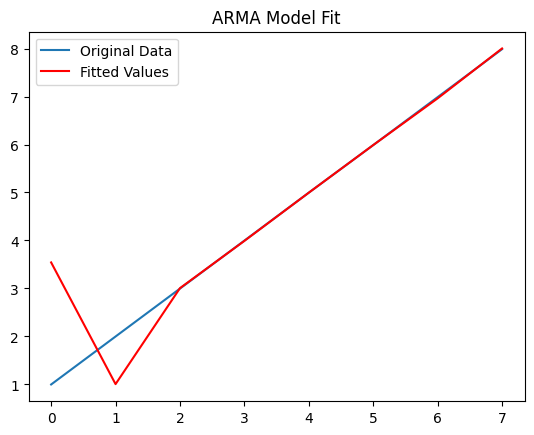

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948EEEA70> 0.9324861543960552 0.8217876242241124
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  20.737
Date:                Wed, 05 Jun 2024   AIC                            -29.475
Time:                        15:42:17   BIC                            -30.724
Sample:                             0   HQIC                           -34.476
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5045   2.24e-15   1.57e+15      0.000       3.504       3.504
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


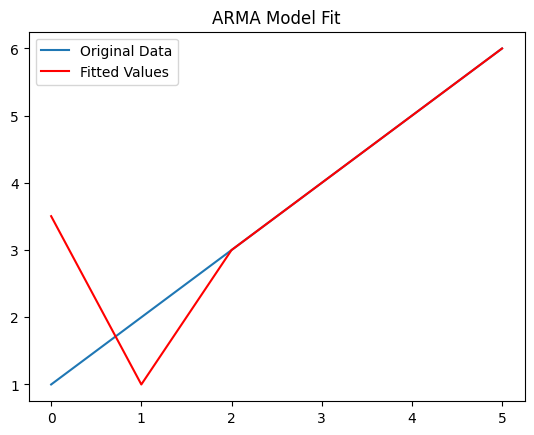

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9494259C0> 1.2122196059531343 0.5843614434635755
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  30.815
Date:                Wed, 05 Jun 2024   AIC                            -49.630
Time:                        15:42:17   BIC                            -45.382
Sample:                             0   HQIC                           -49.675
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5271     12.422      0.686      0.492     -15.820      32.874
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


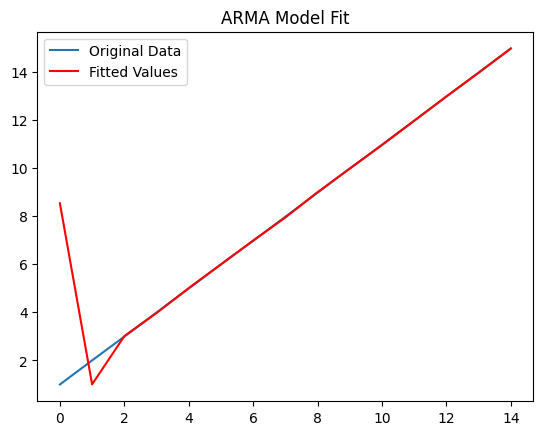

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948CC4940> 3.843394255041467 0.792679255769171
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   9.425
Date:                Wed, 05 Jun 2024   AIC                             -6.850
Time:                        15:42:18   BIC                             -8.099
Sample:                             0   HQIC                           -11.851
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9560     26.939      0.073      0.942     -50.843      54.755
ar.L1         

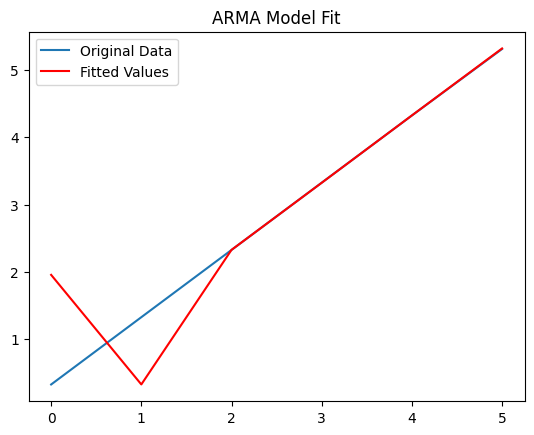

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948D3F1F0> 0.6088243949944844 0.7903071791259548


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -1.643
Date:                Wed, 05 Jun 2024   AIC                             15.287
Time:                        15:42:18   BIC                             15.763
Sample:                             0   HQIC                            12.072
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9824     13.988      0.356      0.722     -22.434      32.399
ar.L1          1.9652      0.341      5.771      0.000       1.298       2.633
ar.L2         -0.9994      0.024    -42.281      0

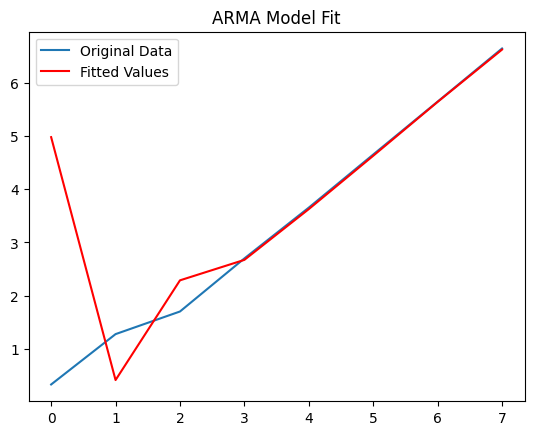

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948F3E980> 2.845937520045668 0.34152881494027276


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   7.589
Date:                Wed, 05 Jun 2024   AIC                             -3.178
Time:                        15:42:19   BIC                             -4.428
Sample:                             0   HQIC                            -8.180
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6449      0.690      3.835      0.000       1.293       3.997
ar.L1          1.9931      0.016    126.019      0.000       1.962       2.024
ar.L2         -1.0000      0.000  -2984.872      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


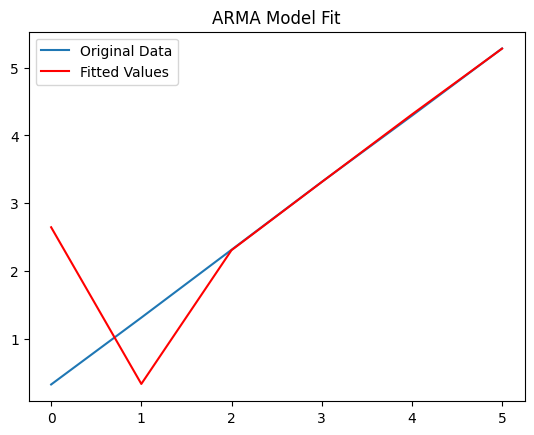

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948B18460> 1.0549629146608173 0.6320006490519465
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   7.386
Date:                Wed, 05 Jun 2024   AIC                             -2.772
Time:                        15:42:19   BIC                             -8.180
Sample:                             0   HQIC                           -13.643
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1074      0.043     25.504      0.000       1.022       1.192
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


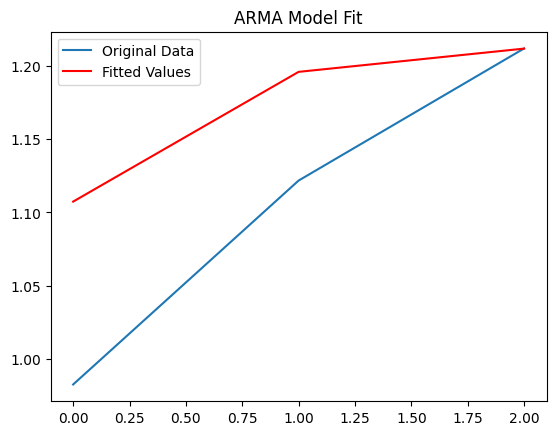

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948ADF610> 0.007026970499338874 0.21021411991179562
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -6.888
Date:                Wed, 05 Jun 2024   AIC                             25.775
Time:                        15:42:20   BIC                             27.591
Sample:                             0   HQIC                            23.784
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4944      1.427      2.449      0.014       0.698       6.291
ar.L1    

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


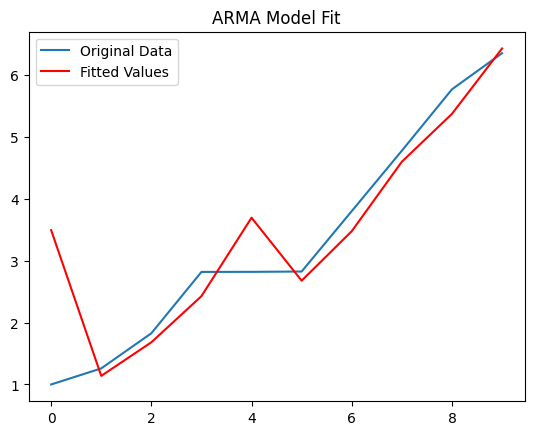

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948955120> 0.7500781804503295 0.7513650224778845
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   0.327
Date:                Wed, 05 Jun 2024   AIC                             11.345
Time:                        15:42:20   BIC                              7.663
Sample:                             0   HQIC                             3.265
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3206      7.314      0.044      0.965     -14.014      14.655
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


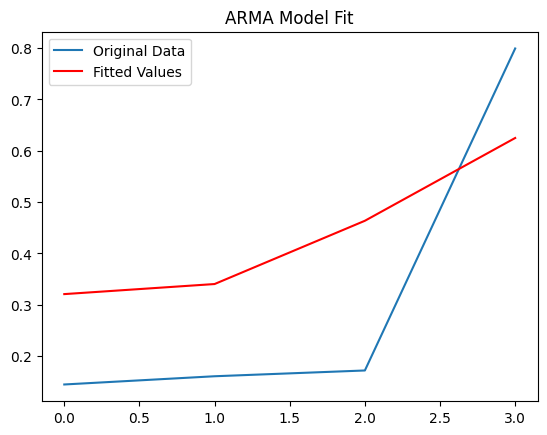

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9489AFDC0> 0.04474935916193625 0.41916463296390927
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -0.419
Date:                Wed, 05 Jun 2024   AIC                             12.838
Time:                        15:42:21   BIC                             15.748
Sample:                             0   HQIC                            11.761
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1192      8.023      0.638      0.523     -10.605      20.844
ar.L1     

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


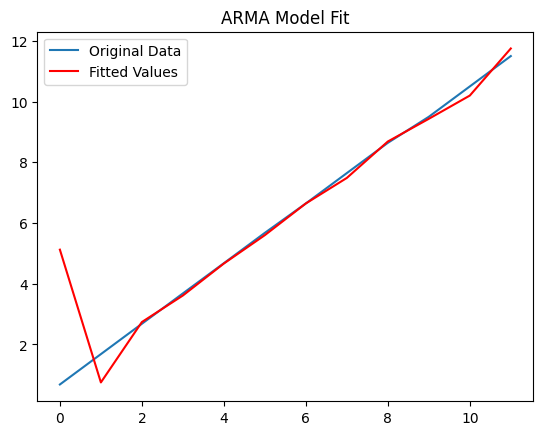

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D92BAC6EF0> 1.7323705904484321 0.8491976672843617
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   3.329
Date:                Wed, 05 Jun 2024   AIC                              5.342
Time:                        15:42:21   BIC                              7.729
Sample:                             0   HQIC                             3.837
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1860     13.246     -0.090      0.929     -27.148      24.776
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


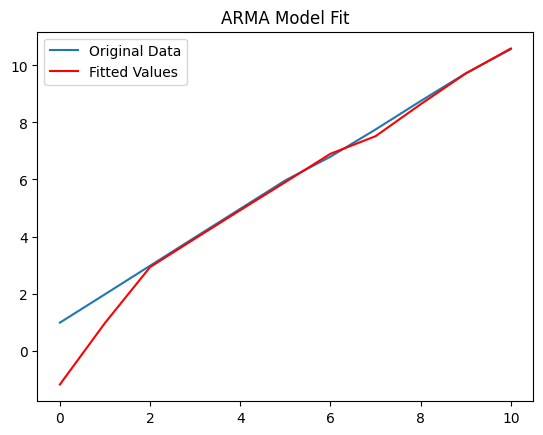

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94893BA30> 0.5269935142423362 0.9428325996800831
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -4.464
Date:                Wed, 05 Jun 2024   AIC                             20.928
Time:                        15:42:22   BIC                             26.270
Sample:                             0   HQIC                            21.664
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3995     43.859      0.214      0.830     -76.562      95.361
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


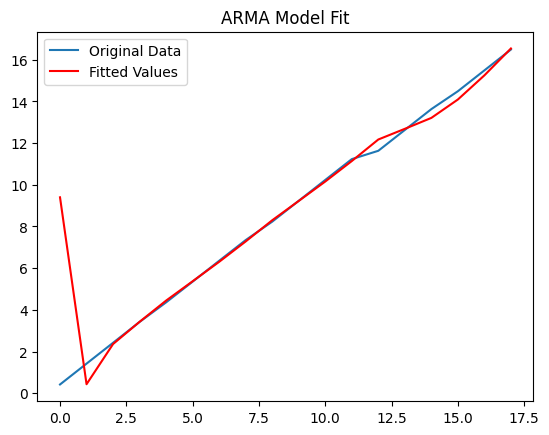

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9488D33A0> 4.570767435427521 0.8057660071801325
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -7.069
Date:                Wed, 05 Jun 2024   AIC                             26.138
Time:                        15:42:22   BIC                             30.774
Sample:                             0   HQIC                            26.376
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6227      6.594      1.004      0.315      -6.302      19.547
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


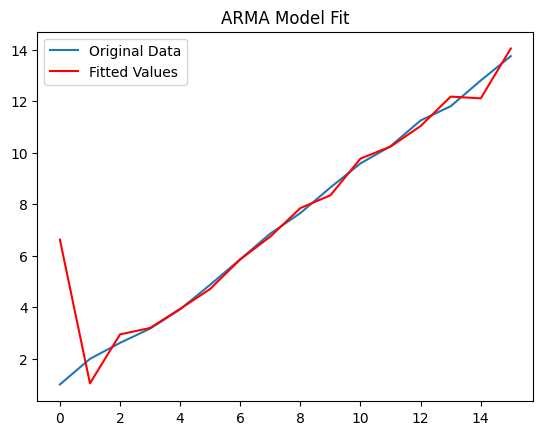

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9491C43D0> 2.103527560267903 0.8656206932805324
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -8.621
Date:                Wed, 05 Jun 2024   AIC                             29.242
Time:                        15:42:23   BIC                             33.490
Sample:                             0   HQIC                            29.196
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4716      5.217      1.432      0.152      -2.753      17.696
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


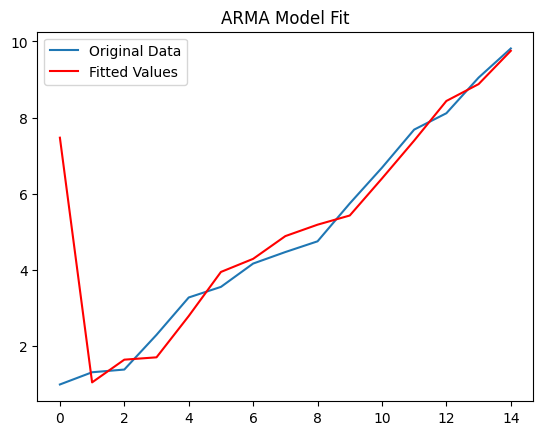

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949239EA0> 2.9072503612579963 0.6231596011034064
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -12.651
Date:                Wed, 05 Jun 2024   AIC                             37.303
Time:                        15:42:23   BIC                             41.551
Sample:                             0   HQIC                            37.258
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6495      6.227      1.228      0.219      -4.556      19.855
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


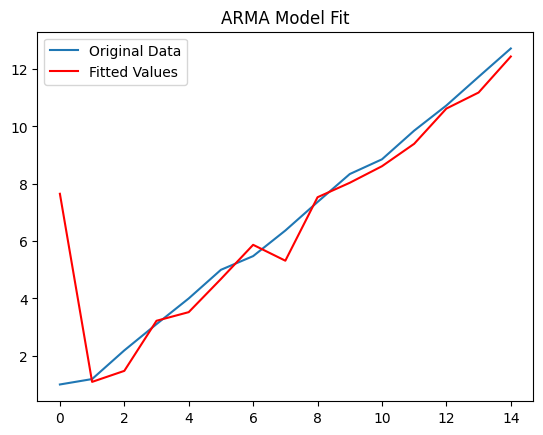

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949239EA0> 3.1414087647790225 0.7677025751650752
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   2.046
Date:                Wed, 05 Jun 2024   AIC                              7.907
Time:                        15:42:24   BIC                              4.225
Sample:                             0   HQIC                            -0.173
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6304      1.684      0.968      0.333      -1.670       4.931
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


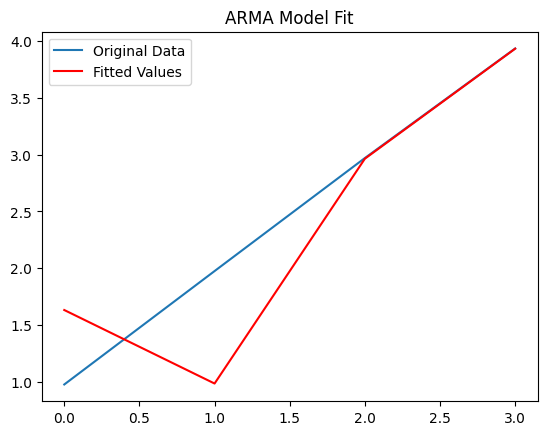

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94975B5E0> 0.3536094492327591 0.7104743047834983


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  14.121
Date:                Wed, 05 Jun 2024   AIC                            -16.242
Time:                        15:42:24   BIC                            -10.900
Sample:                             0   HQIC                           -15.505
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2064     13.813      0.305      0.761     -22.867      31.280
ar.L1          1.9990      0.004    542.598      0.000       1.992       2.006
ar.L2         -0.9998      0.003   -349.192      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


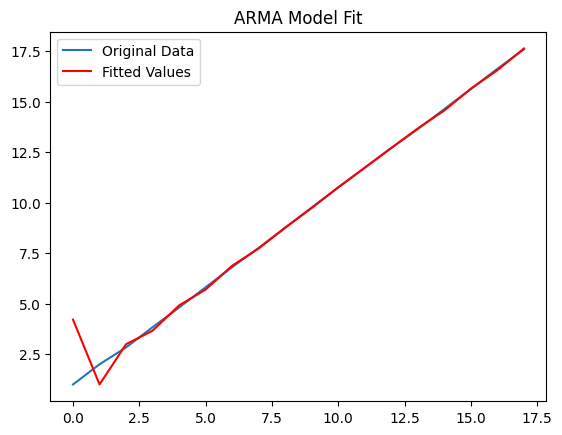

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94929AE90> 0.634094322314169 0.9754462736177747
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  16.518
Date:                Wed, 05 Jun 2024   AIC                            -21.036
Time:                        15:42:25   BIC                            -17.201
Sample:                             0   HQIC                           -21.390
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2880      4.618      1.578      0.115      -1.763      16.339
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


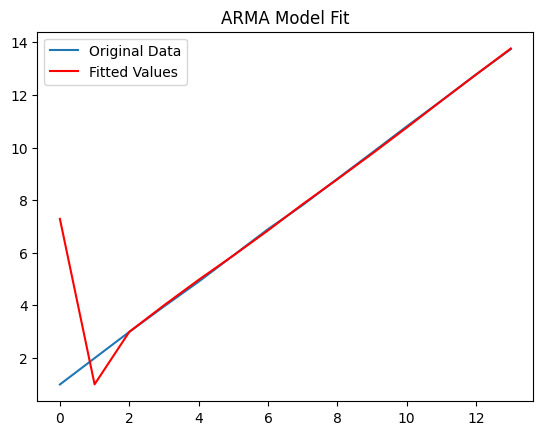

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9492986D0> 2.9043620095843865 0.8137282393702339
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -5.397
Date:                Wed, 05 Jun 2024   AIC                             22.795
Time:                        15:42:25   BIC                             27.043
Sample:                             0   HQIC                            22.750
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5968      3.915      1.940      0.052      -0.077      15.271
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


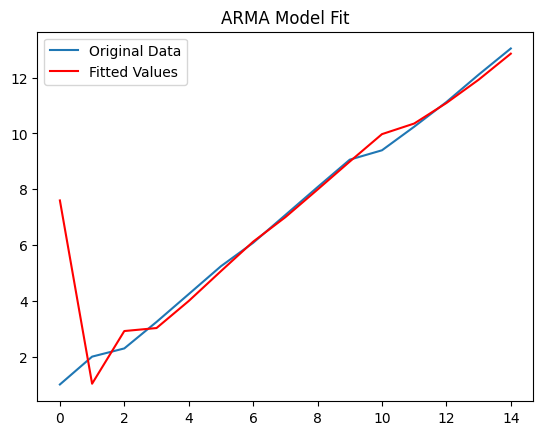

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94909CB20> 3.029839623797449 0.7837527974469177
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -7.439
Date:                Wed, 05 Jun 2024   AIC                             26.877
Time:                        15:42:26   BIC                             32.219
Sample:                             0   HQIC                            27.614
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1125     18.468      1.089      0.276     -16.083      56.308
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


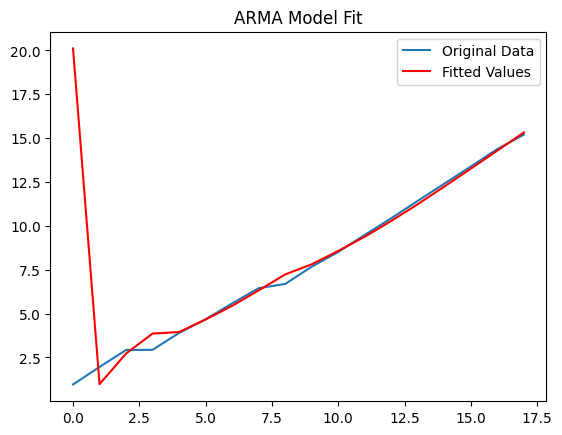

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94909F1C0> 20.505898983420362 -0.10138492841589408
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   17
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -1.474
Date:                Wed, 05 Jun 2024   AIC                             14.947
Time:                        15:42:26   BIC                             19.946
Sample:                             0   HQIC                            15.444
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8067      3.118      3.145      0.002       3.695      15.919
ar.L1     

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


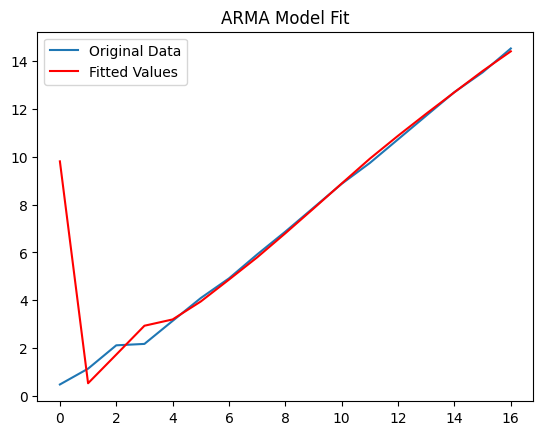

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94883D870> 5.1854036636887955 0.7345849419636347
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -3.355
Date:                Wed, 05 Jun 2024   AIC                             18.711
Time:                        15:42:27   BIC                             15.029
Sample:                             0   HQIC                            10.630
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1536     29.696      0.073      0.942     -56.050      60.357
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


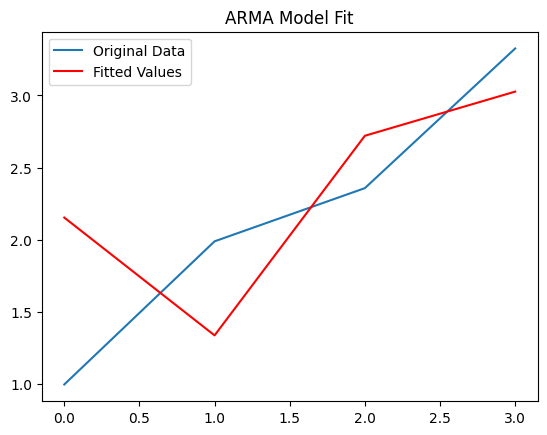

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94909EFB0> 0.49615834733011965 0.28619496805326206
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   3.969
Date:                Wed, 05 Jun 2024   AIC                              4.062
Time:                        15:42:27   BIC                              0.380
Sample:                             0   HQIC                            -4.018
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2177   8.53e-13    2.6e+12      0.000       2.218       2.218
ar.L1     

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


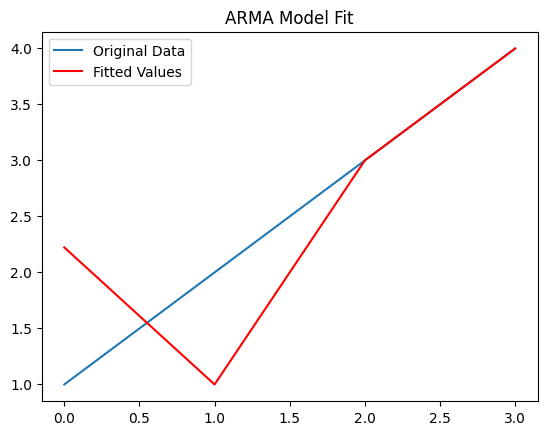

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94883CA90> 0.6240940346283823 0.5000987436154603
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -0.699
Date:                Wed, 05 Jun 2024   AIC                             13.397
Time:                        15:42:28   BIC                             15.213
Sample:                             0   HQIC                            11.406
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7196     99.825      0.057      0.954    -189.934     201.373
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


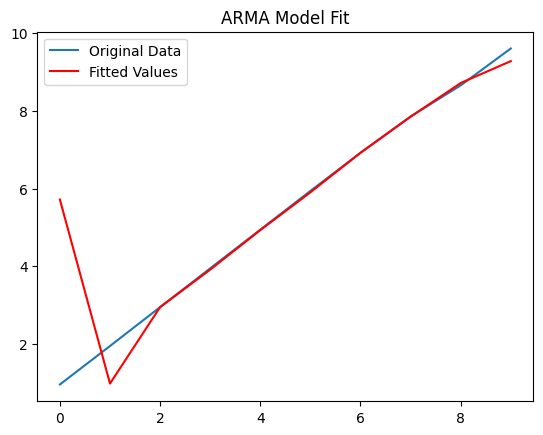

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9489D4550> 2.3714409793881126 0.6917919021665861
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   0.409
Date:                Wed, 05 Jun 2024   AIC                             11.182
Time:                        15:42:28   BIC                              7.500
Sample:                             0   HQIC                             3.101
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6572      1.904      0.345      0.730      -3.075       4.389
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


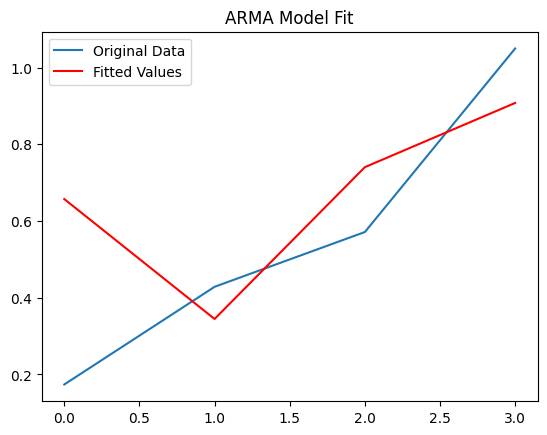

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9489E9870> 0.07235738863168031 0.2877209967506512
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -17.071
Date:                Wed, 05 Jun 2024   AIC                             46.142
Time:                        15:42:29   BIC                             52.116
Sample:                             0   HQIC                            47.308
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5931     10.215      0.645      0.519     -13.427      26.614
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


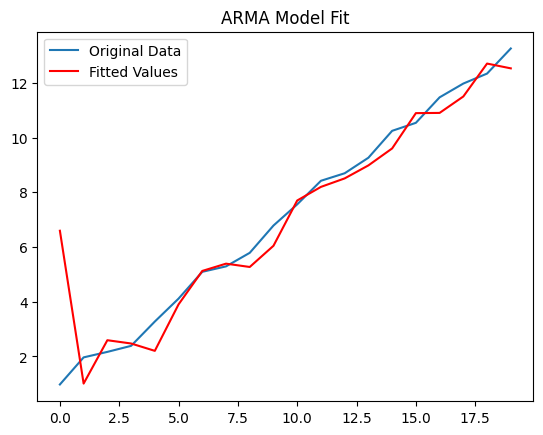

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948C3BD00> 1.8330292154413623 0.870205926381757
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -2.828
Date:                Wed, 05 Jun 2024   AIC                             17.656
Time:                        15:42:29   BIC                             13.974
Sample:                             0   HQIC                             9.576
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0838      8.207      0.132      0.895     -15.001      17.168
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


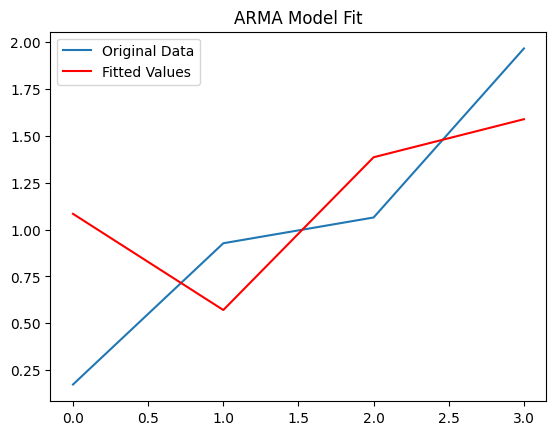

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948C39330> 0.3001202983742253 0.25935270429944424
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -10.809
Date:                Wed, 05 Jun 2024   AIC                             33.618
Time:                        15:42:30   BIC                             37.453
Sample:                             0   HQIC                            33.263
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5782      3.118      1.148      0.251      -2.533       9.690
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


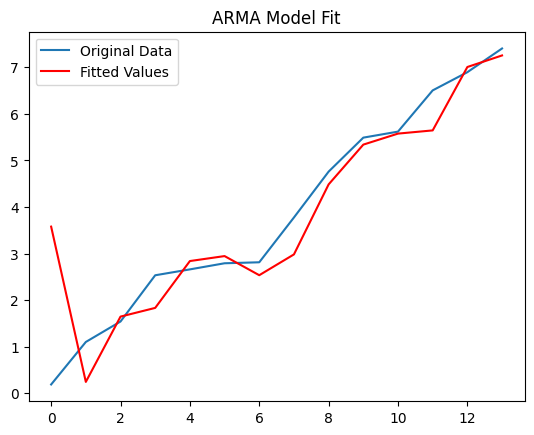

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9488D07F0> 1.0250151444606745 0.7863498911000409
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -4.686
Date:                Wed, 05 Jun 2024   AIC                             21.372
Time:                        15:42:30   BIC                             21.047
Sample:                             0   HQIC                            17.361
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2540      1.698      0.739      0.460      -2.074       4.582
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


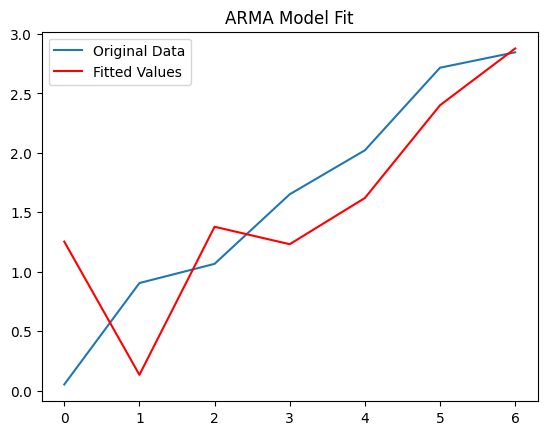

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948D3FDF0> 0.3678117431333116 0.5806543825011832
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -0.805
Date:                Wed, 05 Jun 2024   AIC                             13.609
Time:                        15:42:30   BIC                             12.360
Sample:                             0   HQIC                             8.608
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2642      1.595      1.419      0.156      -0.862       5.391
ar.L1       

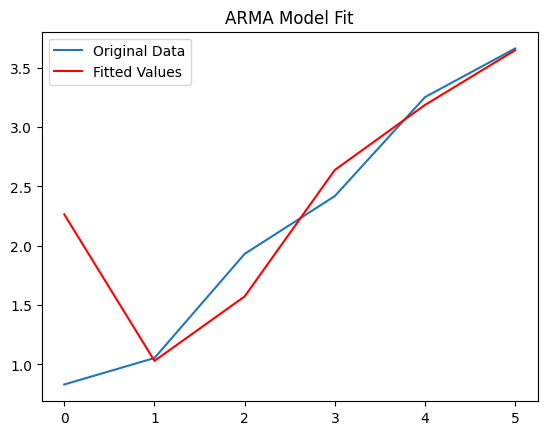

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948F61450> 0.37245630357256654 0.6587457316180476


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   9.651
Date:                Wed, 05 Jun 2024   AIC                             -7.302
Time:                        15:42:31   BIC                             -7.627
Sample:                             0   HQIC                           -11.314
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8515     17.621      0.162      0.871     -31.686      37.389
ar.L1          1.9971      0.004    548.473      0.000       1.990       2.004
ar.L2         -0.9987      0.002   -400.767      0

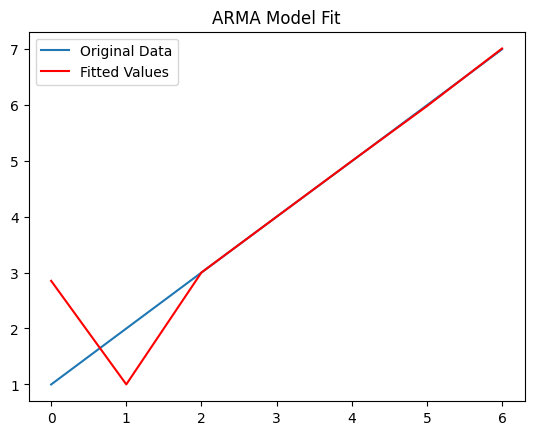

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948F98D90> 0.6322531078789109 0.8411054621287883


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   1.820
Date:                Wed, 05 Jun 2024   AIC                              8.361
Time:                        15:42:31   BIC                              4.679
Sample:                             0   HQIC                             0.280
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1135     11.660     -0.181      0.856     -24.967      20.740
ar.L1          1.9976      0.004    492.278      0.000       1.990       2.006
ar.L2         -0.9996      0.001   -842.872      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


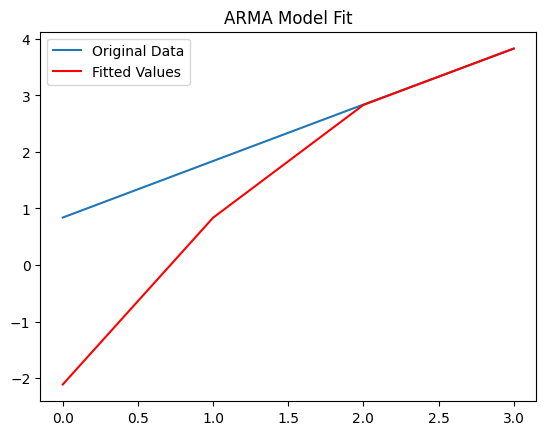

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949092E90> 2.4314620245979093 -0.962368845093154
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   4.207
Date:                Wed, 05 Jun 2024   AIC                              3.586
Time:                        15:42:32   BIC                              6.495
Sample:                             0   HQIC                             2.509
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4333     64.849      0.099      0.921    -120.669     133.536
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


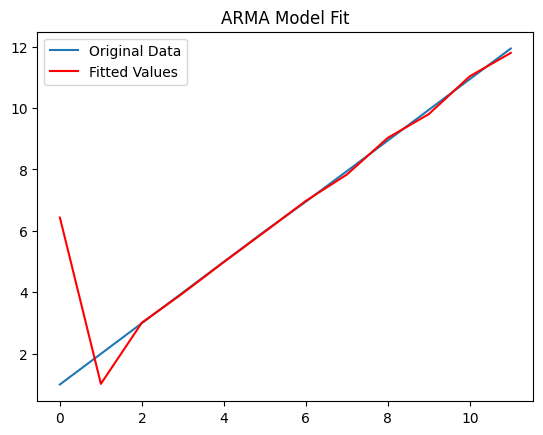

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949092B30> 2.552841689505733 0.7831833422890234
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   9.131
Date:                Wed, 05 Jun 2024   AIC                             -6.263
Time:                        15:42:32   BIC                             -9.945
Sample:                             0   HQIC                           -14.343
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7651      0.571      3.090      0.002       0.645       2.885
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


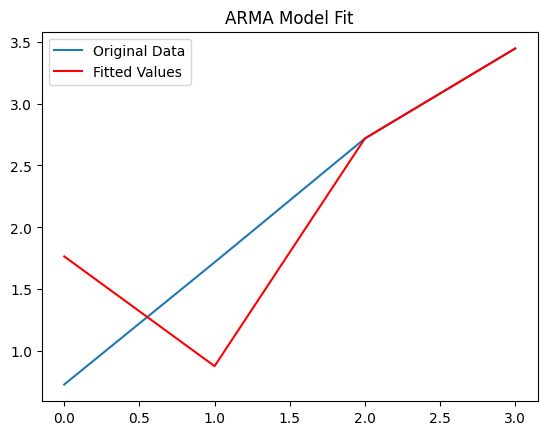

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949091450> 0.44288150884024474 0.5779384549906381
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  14.213
Date:                Wed, 05 Jun 2024   AIC                            -16.426
Time:                        15:42:33   BIC                            -12.178
Sample:                             0   HQIC                           -16.471
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1357     73.774      0.286      0.775    -123.460     165.731
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


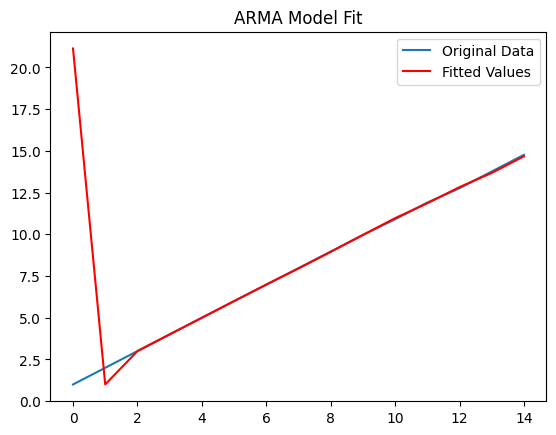

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94912E8C0> 27.09779274007546 -0.5051179227733389
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  13.243
Date:                Wed, 05 Jun 2024   AIC                            -14.486
Time:                        15:42:33   BIC                             -8.511
Sample:                             0   HQIC                           -13.319
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6462     23.161      0.373      0.709     -36.749      54.041
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


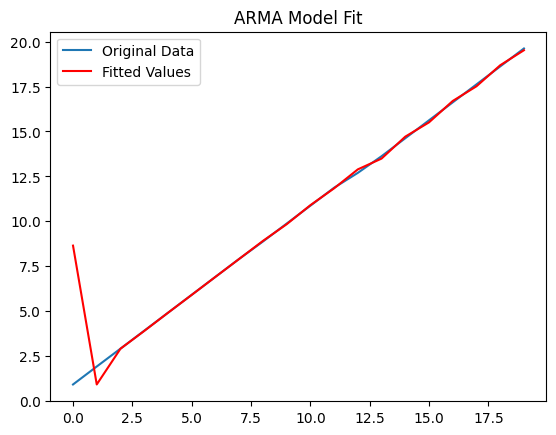

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94912DF00> 3.0430962707295706 0.9045926793716947
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  22.940
Date:                Wed, 05 Jun 2024   AIC                            -33.880
Time:                        15:42:34   BIC                            -32.697
Sample:                             0   HQIC                           -36.434
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0671     16.752      0.302      0.762     -27.766      37.901
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


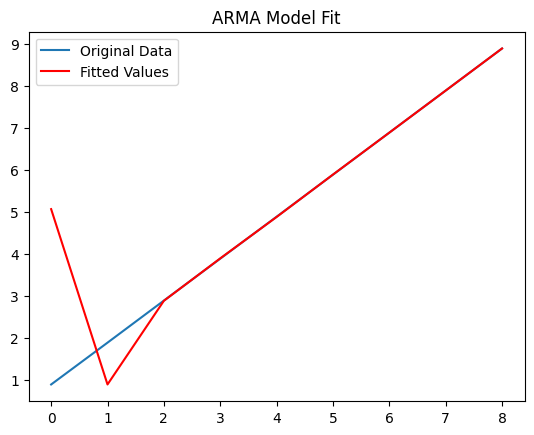

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94912C340> 2.041249818022837 0.6929946580322335
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   5.748
Date:                Wed, 05 Jun 2024   AIC                              0.504
Time:                        15:42:35   BIC                              1.687
Sample:                             0   HQIC                            -2.050
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0024      7.069      0.708      0.479      -8.853      18.857
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


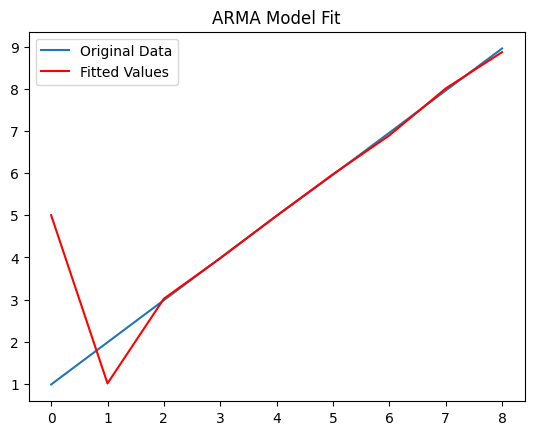

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948D67AC0> 1.8994744331056568 0.7124481616713061
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  23.073
Date:                Wed, 05 Jun 2024   AIC                            -34.146
Time:                        15:42:35   BIC                            -31.236
Sample:                             0   HQIC                           -35.223
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6030      4.663      1.416      0.157      -2.536      15.742
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


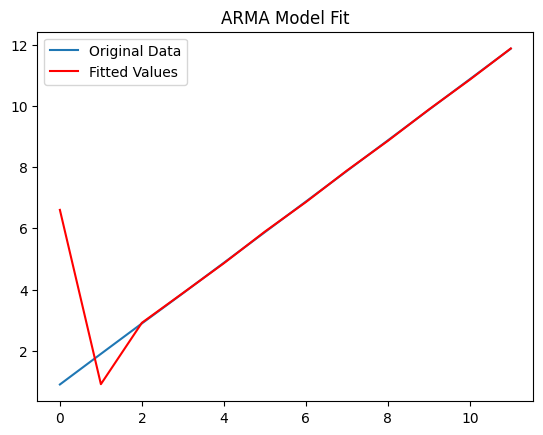

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948D64310> 2.795161279983988 0.7644250357154124
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   3.254
Date:                Wed, 05 Jun 2024   AIC                              5.492
Time:                        15:42:35   BIC                              1.810
Sample:                             0   HQIC                            -2.588
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4645      0.028     86.521      0.000       2.409       2.520
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


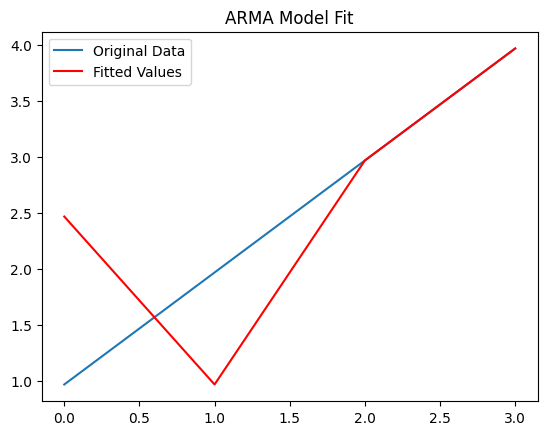

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949427F10> 0.812119212004071 0.3502990381893537


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   17
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   8.664
Date:                Wed, 05 Jun 2024   AIC                             -5.327
Time:                        15:42:36   BIC                             -0.328
Sample:                             0   HQIC                            -4.830
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7108     51.452      0.150      0.881     -93.134     108.555
ar.L1          1.9985      0.006    311.280      0.000       1.986       2.011
ar.L2         -0.9994      0.006   -159.778      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


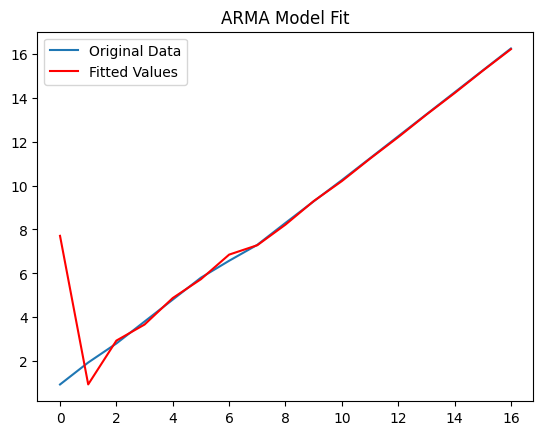

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948F611B0> 2.7624231702393054 0.8719845111145285
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   4.669
Date:                Wed, 05 Jun 2024   AIC                              2.662
Time:                        15:42:37   BIC                              0.319
Sample:                             0   HQIC                            -3.627
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2661     12.568      0.260      0.795     -21.367      27.899
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


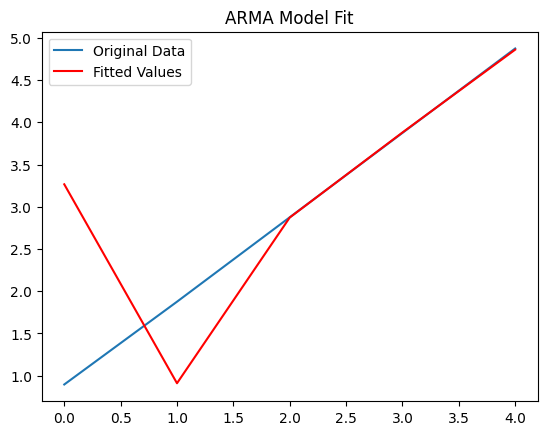

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9495B5C30> 1.31051798111438 0.33912543193177436
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -5.288
Date:                Wed, 05 Jun 2024   AIC                             22.576
Time:                        15:42:37   BIC                             25.485
Sample:                             0   HQIC                            21.498
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2823      0.935      1.371      0.170      -0.551       3.116
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


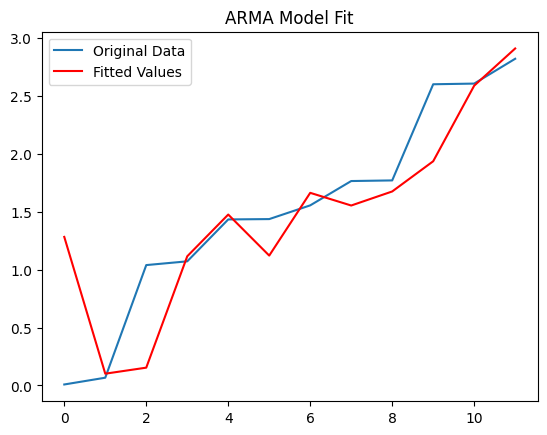

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9496609A0> 0.2522395703811103 0.6637916162631743
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   3.228
Date:                Wed, 05 Jun 2024   AIC                              5.545
Time:                        15:42:38   BIC                             10.180
Sample:                             0   HQIC                             5.782
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3895      0.170      8.170      0.000       1.056       1.723
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


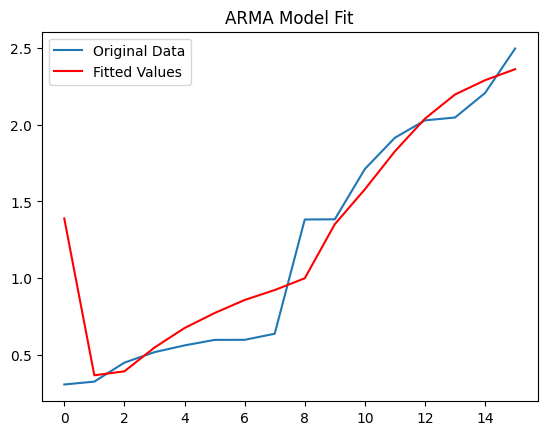

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949625870> 0.09922656291392708 0.8229690268386867
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -9.770
Date:                Wed, 05 Jun 2024   AIC                             31.539
Time:                        15:42:38   BIC                             33.927
Sample:                             0   HQIC                            30.035
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1234      1.608      1.320      0.187      -1.029       5.275
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


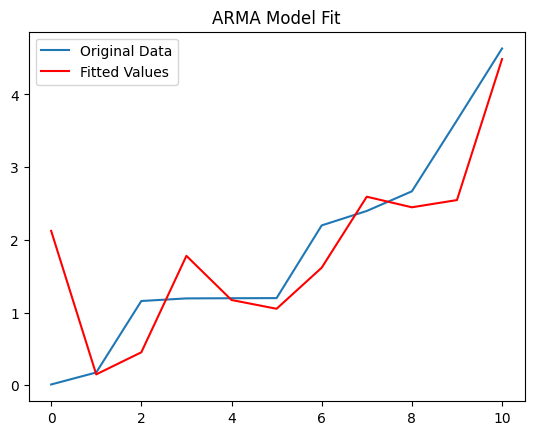

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949446F80> 0.6344869058606619 0.6509787149122603
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   1.971
Date:                Wed, 05 Jun 2024   AIC                              8.059
Time:                        15:42:38   BIC                              7.734
Sample:                             0   HQIC                             4.048
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0672      7.211      0.703      0.482      -9.066      19.200
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


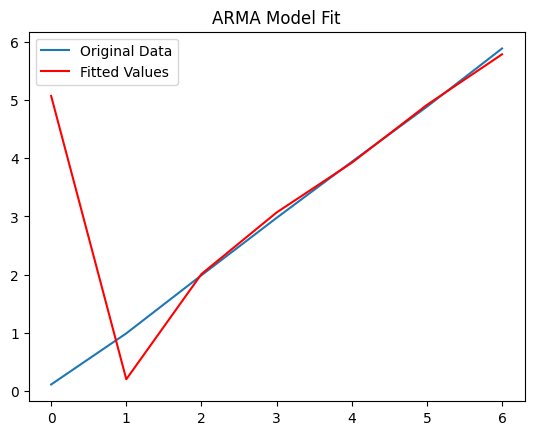

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9494746A0> 3.5959842343948667 0.035416107671629504
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   17
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   9.070
Date:                Wed, 05 Jun 2024   AIC                             -6.140
Time:                        15:42:39   BIC                             -1.140
Sample:                             0   HQIC                            -5.643
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8488     21.947      0.403      0.687     -34.167      51.864
ar.L1     

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


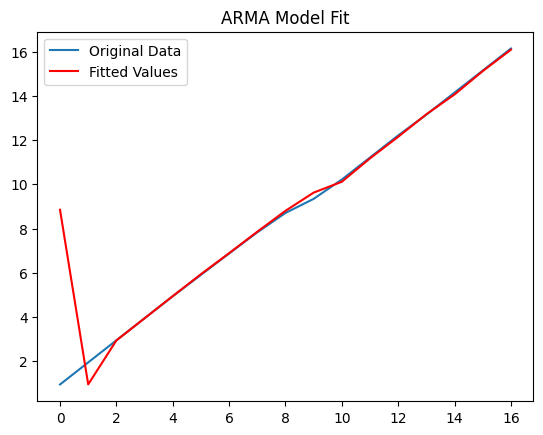

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9495921A0> 3.7480631656664536 0.8210207849460257


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -4.011
Date:                Wed, 05 Jun 2024   AIC                             20.022
Time:                        15:42:39   BIC                             22.931
Sample:                             0   HQIC                            18.945
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3286      2.879      2.198      0.028       0.686      11.971
ar.L1          1.9650      0.029     67.456      0.000       1.908       2.022
ar.L2         -0.9969      0.030    -33.598      0

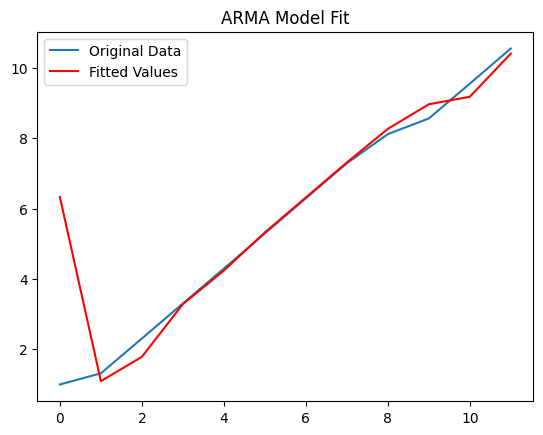

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94964FF10> 2.4220552399757627 0.7494682498204999


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   2.825
Date:                Wed, 05 Jun 2024   AIC                              6.351
Time:                        15:42:40   BIC                              0.942
Sample:                             0   HQIC                            -4.521
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7063      0.455      3.752      0.000       0.815       2.598
ar.L1          1.4064      0.324      4.341      0.000       0.771       2.041
ar.L2         -1.0000   1.92e-05   -5.2e+04      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


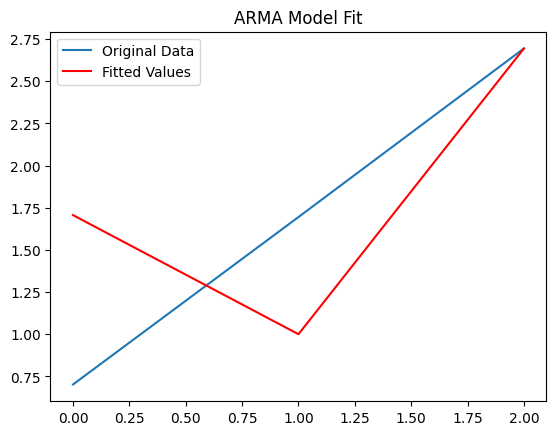

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949302A10> 0.4971506304742295 0.24875567108536079
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -2.043
Date:                Wed, 05 Jun 2024   AIC                             16.086
Time:                        15:42:40   BIC                             13.743
Sample:                             0   HQIC                             9.797
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2102      2.646      0.835      0.404      -2.977       7.397
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


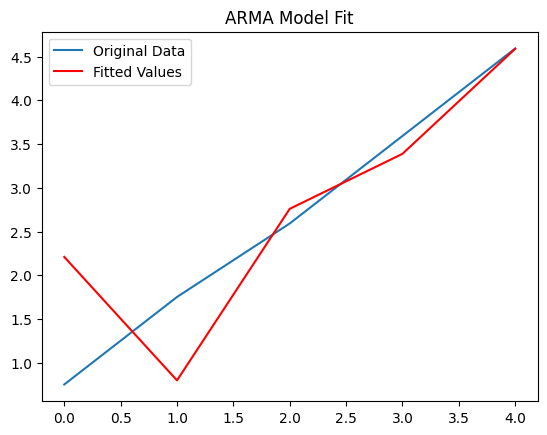

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9493028C0> 0.6206679656063306 0.6578853112761892
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   3.994
Date:                Wed, 05 Jun 2024   AIC                              4.011
Time:                        15:42:41   BIC                              1.668
Sample:                             0   HQIC                            -2.278
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9879      6.679      0.747      0.455      -8.102      18.078
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


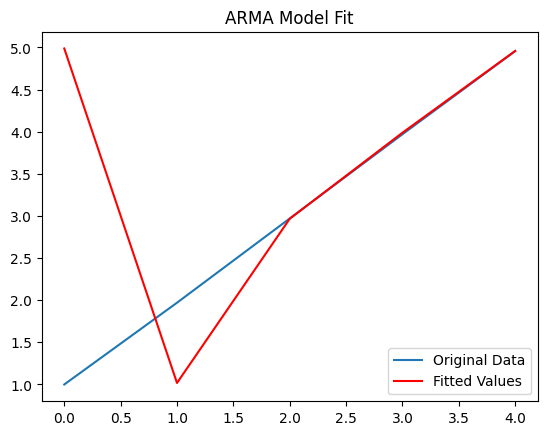

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949541EA0> 3.363132250607921 -0.7111066854386898
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -6.214
Date:                Wed, 05 Jun 2024   AIC                             24.428
Time:                        15:42:41   BIC                             24.905
Sample:                             0   HQIC                            21.213
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2340     28.804      0.112      0.911     -53.221      59.689
ar.L1       

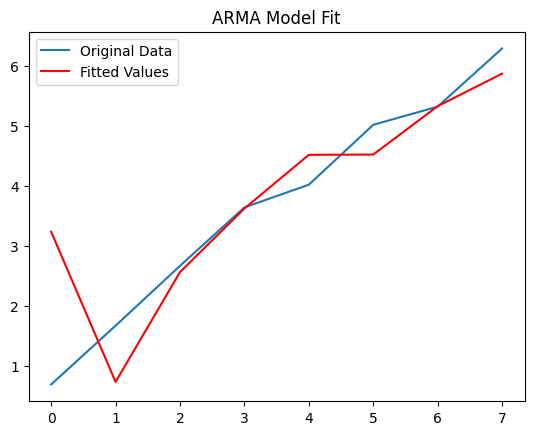

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9493018A0> 1.0081398312716092 0.6837155755279456


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  12.406
Date:                Wed, 05 Jun 2024   AIC                            -12.812
Time:                        15:42:42   BIC                            -16.494
Sample:                             0   HQIC                           -20.892
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3538      0.014     95.524      0.000       1.326       1.382
ar.L1          1.2821      0.141      9.112      0.000       1.006       1.558
ar.L2         -1.0000   1.24e-05  -8.06e+04      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


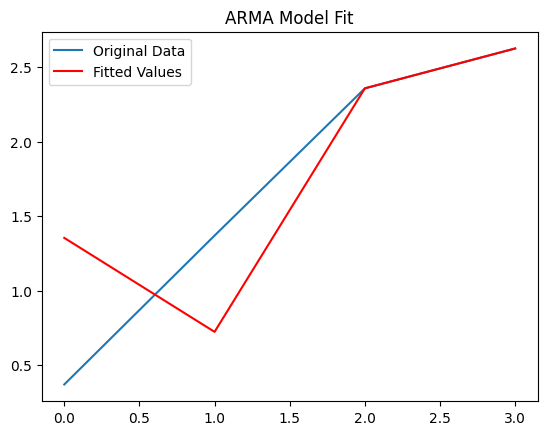

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949540100> 0.3468181753467442 0.5621958419296547


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  17.160
Date:                Wed, 05 Jun 2024   AIC                            -22.321
Time:                        15:42:42   BIC                            -16.654
Sample:                             0   HQIC                           -21.362
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1736      5.616      2.168      0.030       1.167      23.180
ar.L1          1.9959      0.008    241.797      0.000       1.980       2.012
ar.L2         -0.9989      0.008   -126.559      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


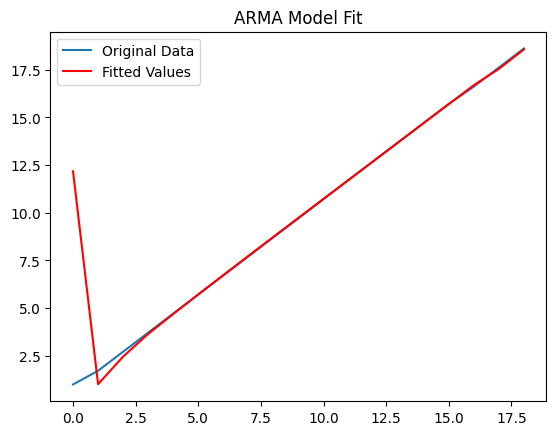

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949302A10> 6.609233882114762 0.7759530003177515
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   4.207
Date:                Wed, 05 Jun 2024   AIC                              3.586
Time:                        15:42:43   BIC                              1.243
Sample:                             0   HQIC                            -2.703
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3203      7.998      0.665      0.506     -10.356      20.997
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


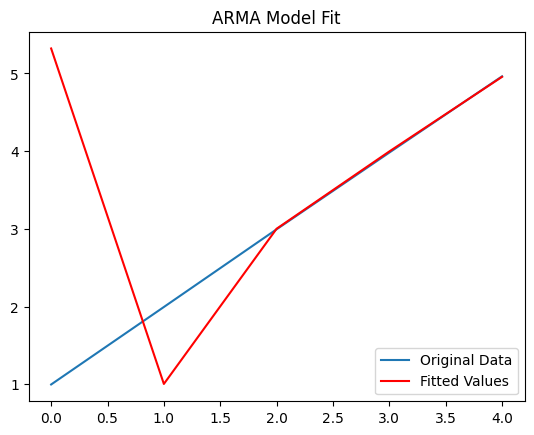

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9496058D0> 3.932819485699869 -1.0003608811036218
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -5.817
Date:                Wed, 05 Jun 2024   AIC                             23.635
Time:                        15:42:43   BIC                             24.112
Sample:                             0   HQIC                            20.420
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0089    123.811      0.032      0.974    -238.656     246.674
ar.L1       

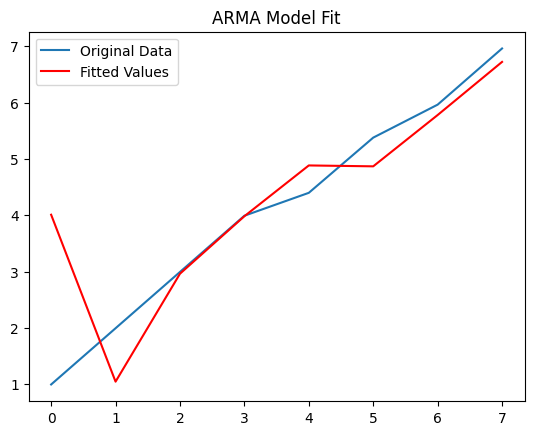

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948DDBE80> 1.3208441057642366 0.6315571978132579


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  14.695
Date:                Wed, 05 Jun 2024   AIC                            -17.390
Time:                        15:42:44   BIC                            -11.724
Sample:                             0   HQIC                           -16.431
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7790     40.542      0.217      0.829     -70.682      88.240
ar.L1          1.9823      0.077     25.753      0.000       1.831       2.133
ar.L2         -0.9848      0.082    -12.000      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


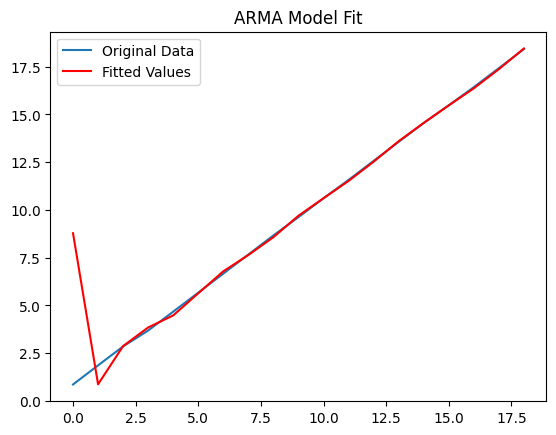

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9491DC9D0> 3.3572619353932835 0.8826553120045203
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -6.693
Date:                Wed, 05 Jun 2024   AIC                             25.386
Time:                        15:42:44   BIC                             31.360
Sample:                             0   HQIC                            26.552
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9883      7.108      1.405      0.160      -3.943      23.920
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


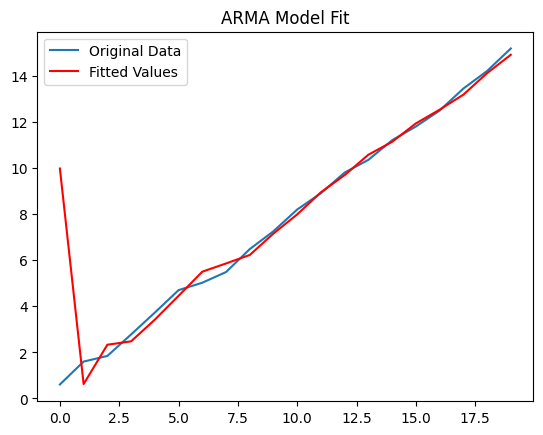

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948E49B40> 4.511089447865912 0.7639082999411755
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -7.277
Date:                Wed, 05 Jun 2024   AIC                             26.554
Time:                        15:42:45   BIC                             28.369
Sample:                             0   HQIC                            24.562
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0019      0.802      3.742      0.000       1.430       4.574
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


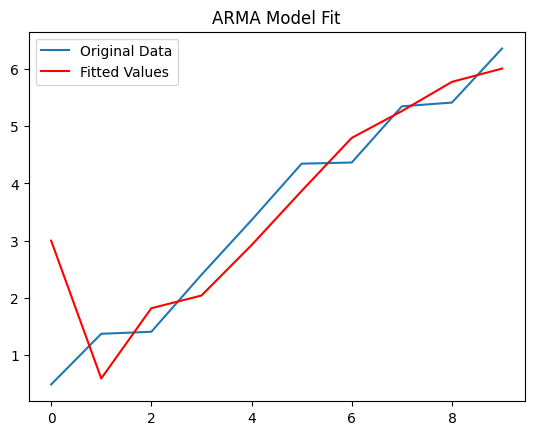

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948D67DC0> 0.8079701636508847 0.7746671815645108
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -5.575
Date:                Wed, 05 Jun 2024   AIC                             23.149
Time:                        15:42:45   BIC                             26.539
Sample:                             0   HQIC                            22.452
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7950     15.004      0.253      0.800     -25.613      33.203
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


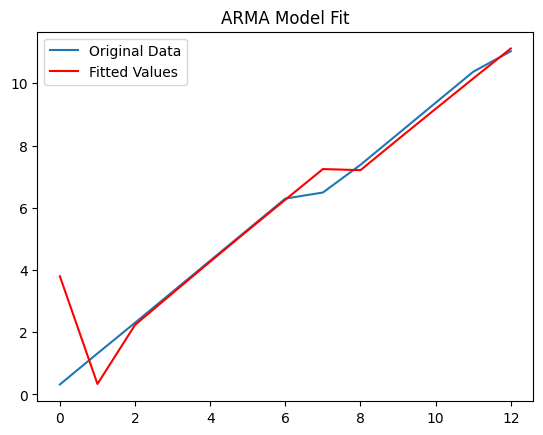

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949267010> 1.060781301682959 0.9028962295052121
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -5.108
Date:                Wed, 05 Jun 2024   AIC                             22.217
Time:                        15:42:46   BIC                             24.604
Sample:                             0   HQIC                            20.712
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9754      1.266      2.350      0.019       0.493       5.457
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


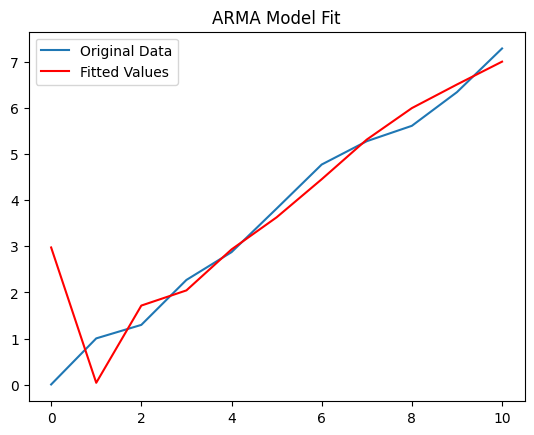

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9492026B0> 0.9444605193995859 0.8166701866853148
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   17
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -15.940
Date:                Wed, 05 Jun 2024   AIC                             43.880
Time:                        15:42:46   BIC                             48.879
Sample:                             0   HQIC                            44.377
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8029      4.665      1.030      0.303      -4.340      13.945
ar.L1       

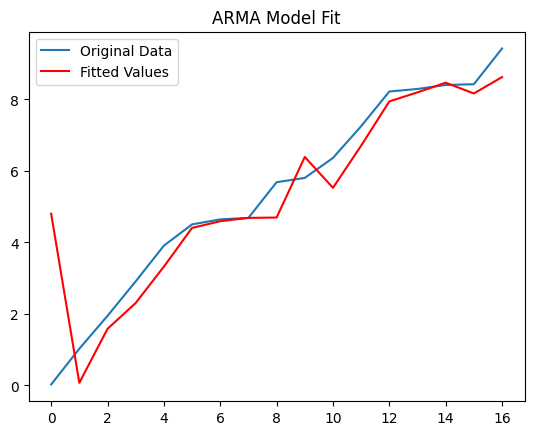

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949446DD0> 1.628508753094839 0.7793483270277202


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   4.493
Date:                Wed, 05 Jun 2024   AIC                              3.015
Time:                        15:42:47   BIC                             -2.394
Sample:                             0   HQIC                            -7.857
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7630      0.264      6.685      0.000       1.246       2.280
ar.L1         -1.0097      0.086    -11.684      0.000      -1.179      -0.840
ar.L2         -1.0000      0.001  -1099.735      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


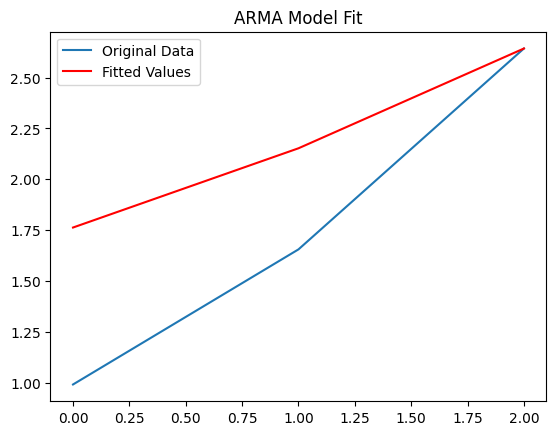

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9492026B0> 0.2809244103533894 0.39033931250888076
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   1.922
Date:                Wed, 05 Jun 2024   AIC                              8.156
Time:                        15:42:47   BIC                              2.748
Sample:                             0   HQIC                            -2.715
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6737      0.688      2.434      0.015       0.326       3.021
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


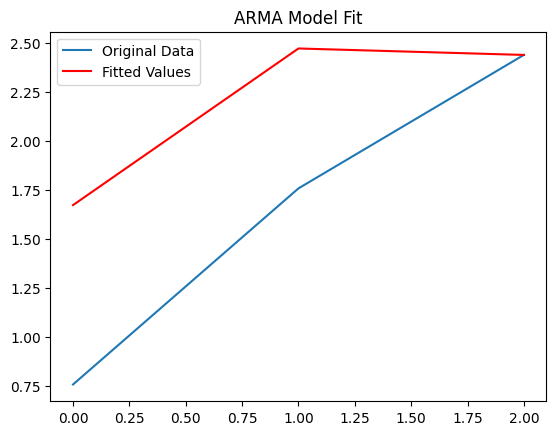

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948E4B7F0> 0.4482066495168371 0.05863708063483042
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -11.682
Date:                Wed, 05 Jun 2024   AIC                             35.364
Time:                        15:42:48   BIC                             41.338
Sample:                             0   HQIC                            36.530
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7835     15.453      0.504      0.614     -22.504      38.071
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


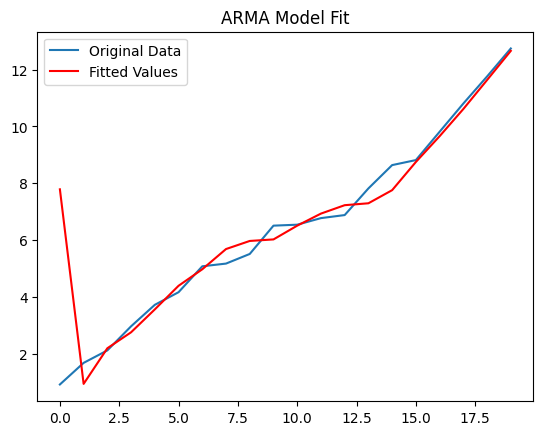

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949200070> 2.4969212824169214 0.7647746485973954
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   7.371
Date:                Wed, 05 Jun 2024   AIC                             -2.743
Time:                        15:42:48   BIC                             -8.151
Sample:                             0   HQIC                           -13.614
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1118      0.249      4.462      0.000       0.623       1.600
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


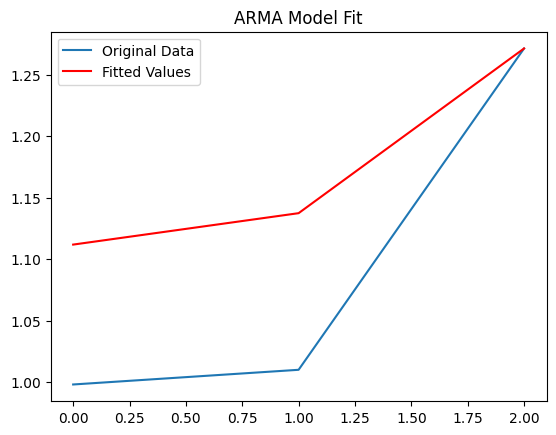

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948EBC670> 0.009727705156509761 0.38853551321527724
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   17
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -14.287
Date:                Wed, 05 Jun 2024   AIC                             40.575
Time:                        15:42:49   BIC                             45.574
Sample:                             0   HQIC                            41.072
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6609      4.826      1.173      0.241      -3.799      15.120
ar.L1    

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


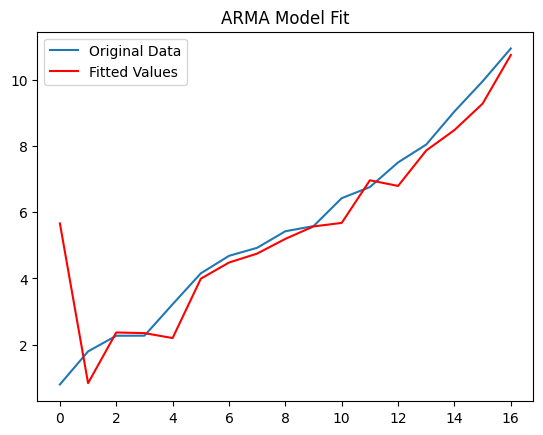

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948CC6AD0> 1.6313123144583956 0.8014527579894976
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -3.332
Date:                Wed, 05 Jun 2024   AIC                             18.664
Time:                        15:42:49   BIC                             23.300
Sample:                             0   HQIC                            18.902
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0591      3.079      3.267      0.001       4.025      16.093
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


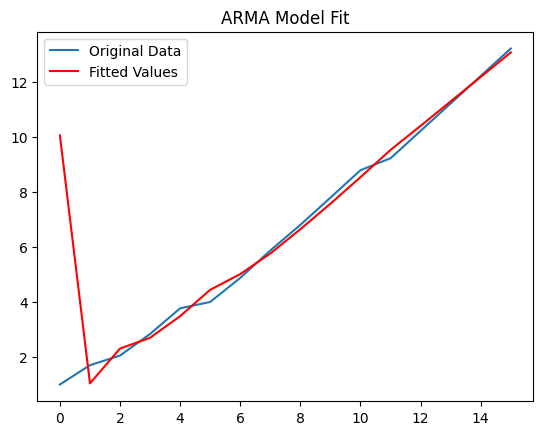

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948D23640> 5.212275737627143 0.6406222425700157
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -17.577
Date:                Wed, 05 Jun 2024   AIC                             47.153
Time:                        15:42:50   BIC                             52.820
Sample:                             0   HQIC                            48.112
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8965      5.648      1.221      0.222      -4.173      17.966
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


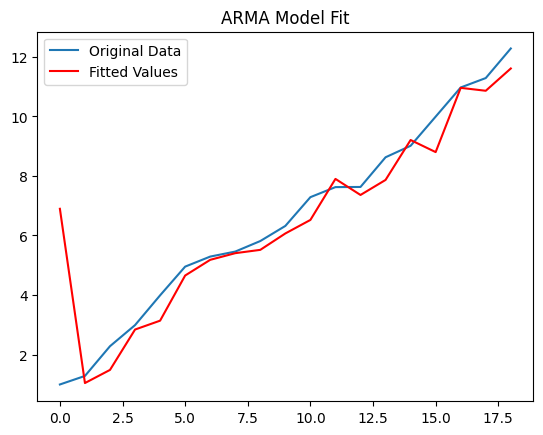

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948CC67A0> 2.099713237253728 0.8023003194579406
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -11.931
Date:                Wed, 05 Jun 2024   AIC                             35.862
Time:                        15:42:50   BIC                             39.697
Sample:                             0   HQIC                            35.507
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4272      3.714      1.192      0.233      -2.852      11.707
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


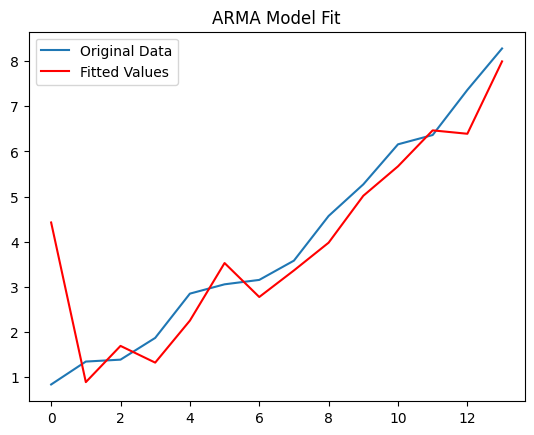

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948CC5030> 1.1372946887903643 0.7827099825332828
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -8.636
Date:                Wed, 05 Jun 2024   AIC                             29.272
Time:                        15:42:51   BIC                             33.106
Sample:                             0   HQIC                            28.917
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9309      3.947      1.249      0.212      -2.805      12.666
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


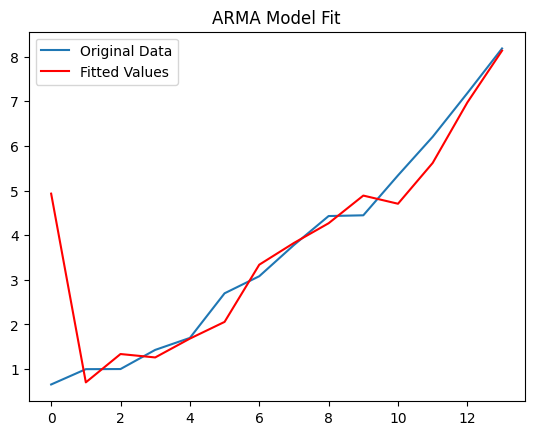

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948C06920> 1.4286456911247478 0.7390307236058642
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  13.193
Date:                Wed, 05 Jun 2024   AIC                            -14.387
Time:                        15:42:51   BIC                            -18.069
Sample:                             0   HQIC                           -22.467
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5197      0.000   4319.253      0.000       1.519       1.520
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


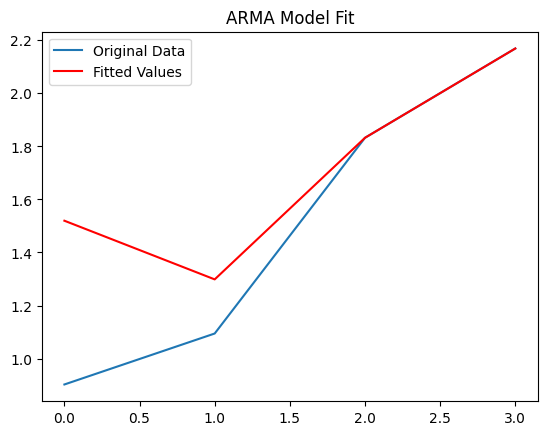

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948BE3FA0> 0.10561300125434873 0.6084445477659254
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -6.840
Date:                Wed, 05 Jun 2024   AIC                             25.679
Time:                        15:42:52   BIC                             29.927
Sample:                             0   HQIC                            25.634
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2084     13.827     -0.160      0.873     -29.308      24.891
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


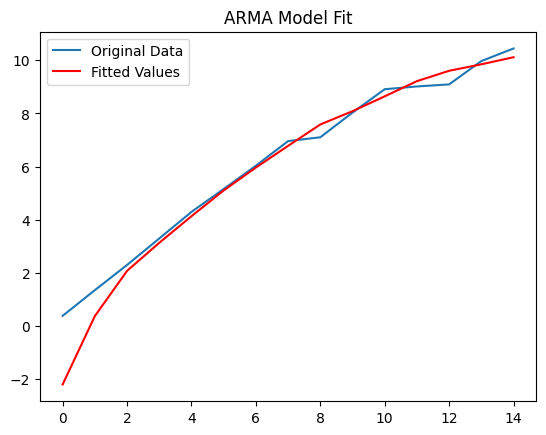

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9490DE710> 0.5676180614089278 0.941930987966139
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -1.940
Date:                Wed, 05 Jun 2024   AIC                             15.880
Time:                        15:42:52   BIC                             12.198
Sample:                             0   HQIC                             7.800
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6478     71.524      0.023      0.982    -138.536     141.832
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


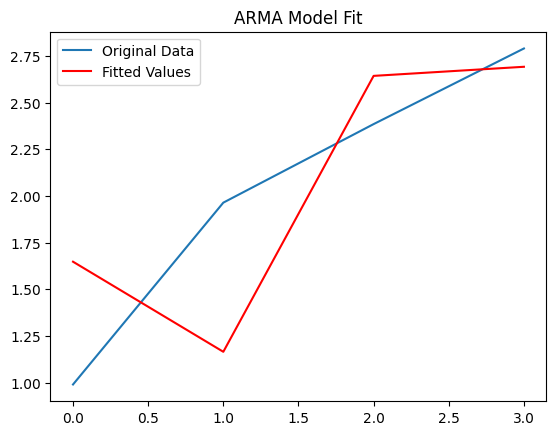

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948CAD360> 0.2865877317360578 0.35882465623378956
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -3.344
Date:                Wed, 05 Jun 2024   AIC                             18.688
Time:                        15:42:52   BIC                             19.164
Sample:                             0   HQIC                            15.473
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8701      1.628      1.763      0.078      -0.320       6.060
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


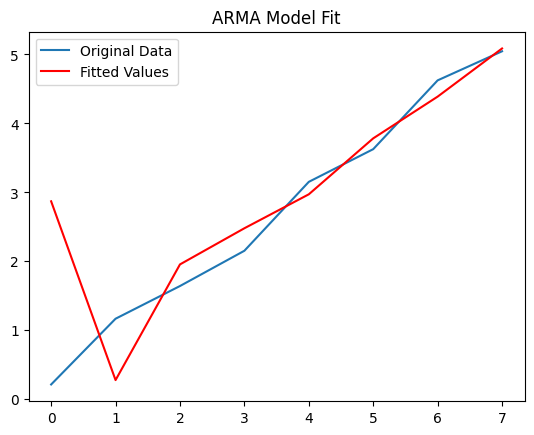

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94893AE60> 1.021048283231697 0.59603471994333
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -1.723
Date:                Wed, 05 Jun 2024   AIC                             15.446
Time:                        15:42:53   BIC                             15.922
Sample:                             0   HQIC                            12.231
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6682     25.715      0.182      0.856     -45.733      55.069
ar.L1          

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


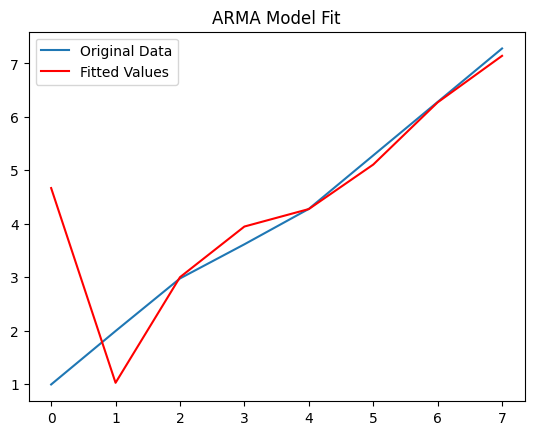

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948955CF0> 1.8236973133036176 0.541726321646034
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -4.000
Date:                Wed, 05 Jun 2024   AIC                             20.000
Time:                        15:42:53   BIC                             20.476
Sample:                             0   HQIC                            16.785
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4540     20.189      0.221      0.825     -35.116      44.024
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


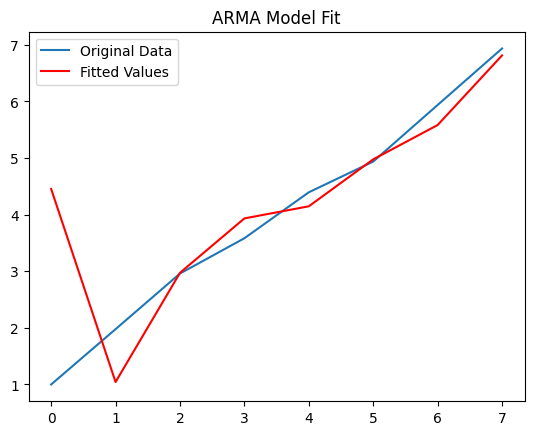

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948A803A0> 1.6417378858853582 0.5266543914814051


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -23.140
Date:                Wed, 05 Jun 2024   AIC                             58.280
Time:                        15:42:54   BIC                             64.826
Sample:                             0   HQIC                            59.822
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5777      7.071      1.213      0.225      -5.281      22.436
ar.L1          0.2354      0.223      1.056      0.291      -0.202       0.672
ar.L2          0.7443      0.217      3.423      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


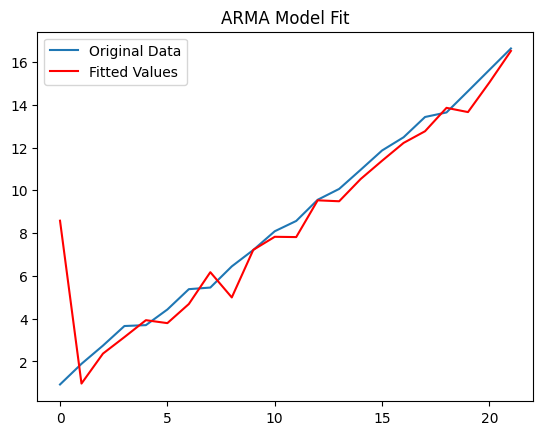

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94883EDA0> 3.0329578839717173 0.8564335920597611
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -6.702
Date:                Wed, 05 Jun 2024   AIC                             25.404
Time:                        15:42:54   BIC                             26.588
Sample:                             0   HQIC                            22.851
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1254      2.533      1.234      0.217      -1.839       8.090
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


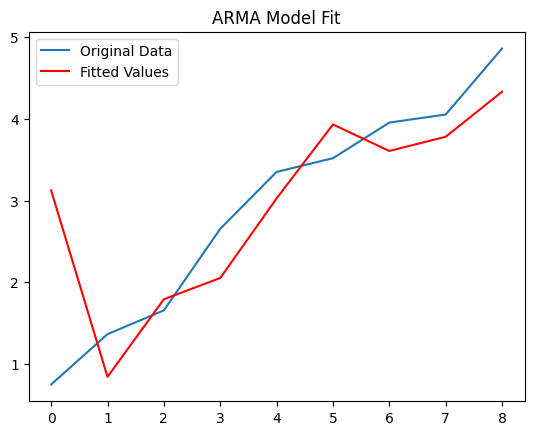

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948CAD360> 0.7834309768590826 0.5442702630437017
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -3.555
Date:                Wed, 05 Jun 2024   AIC                             19.109
Time:                        15:42:55   BIC                             20.925
Sample:                             0   HQIC                            17.118
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5774     12.535      0.285      0.775     -20.991      28.146
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


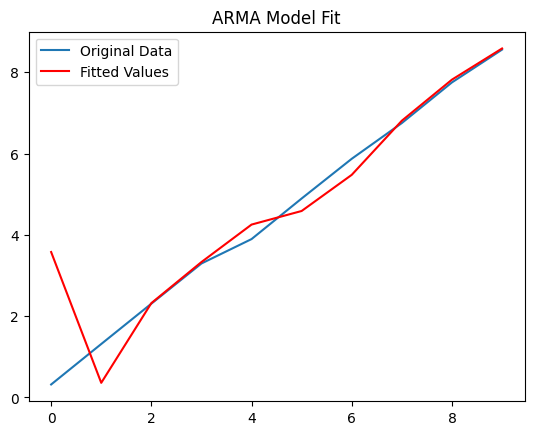

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9488D32B0> 1.19260521558196 0.8256961393529836
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -2.756
Date:                Wed, 05 Jun 2024   AIC                             17.513
Time:                        15:42:55   BIC                             17.990
Sample:                             0   HQIC                            14.298
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9860      0.876      3.410      0.001       1.270       4.702
ar.L1         

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


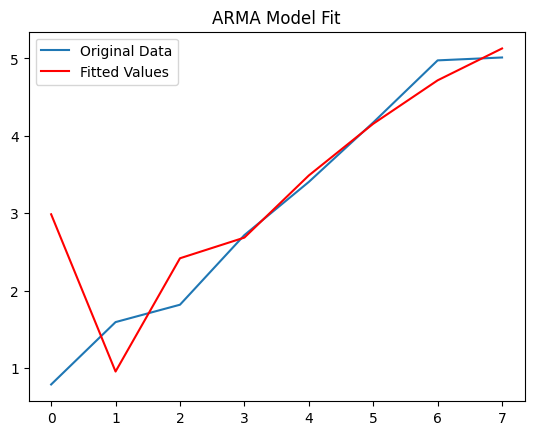

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9488A4490> 0.7113402068075818 0.680404584469795
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  15.554
Date:                Wed, 05 Jun 2024   AIC                            -19.109
Time:                        15:42:56   BIC                            -15.274
Sample:                             0   HQIC                           -19.464
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4323     11.685      0.636      0.525     -15.469      30.334
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


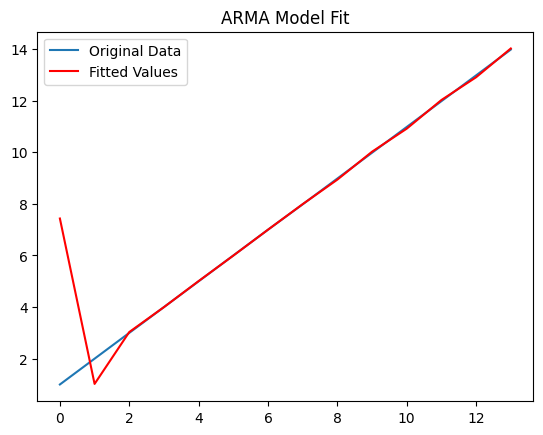

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948AA8AF0> 3.0255459328362213 0.8131083469456812
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  55.813
Date:                Wed, 05 Jun 2024   AIC                            -99.627
Time:                        15:42:56   BIC                            -95.792
Sample:                             0   HQIC                           -99.981
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5045      0.000   4.01e+04      0.000       7.504       7.505
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


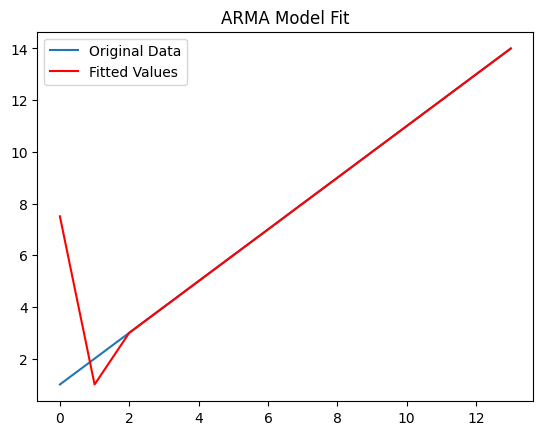

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948AA9FF0> 3.093674610314427 0.8095369993469316
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  11.132
Date:                Wed, 05 Jun 2024   AIC                            -10.264
Time:                        15:42:57   BIC                            -13.946
Sample:                             0   HQIC                           -18.345
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9815      0.248      7.990      0.000       1.495       2.467
ar.L1        

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


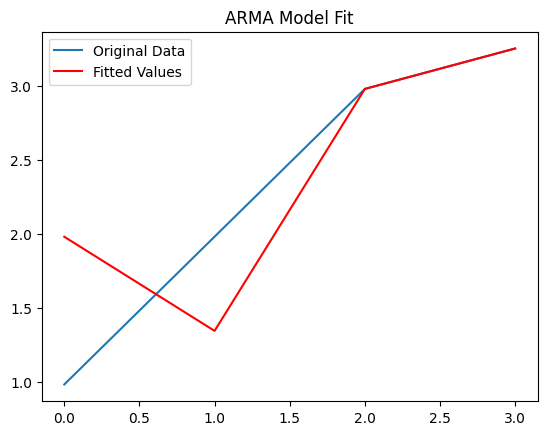

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948ADDBA0> 0.35125966922134627 0.5629896406360417
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   8.394
Date:                Wed, 05 Jun 2024   AIC                             -4.789
Time:                        15:42:57   BIC                             -5.113
Sample:                             0   HQIC                            -8.800
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2002     17.468      0.069      0.945     -33.037      35.437
ar.L1      

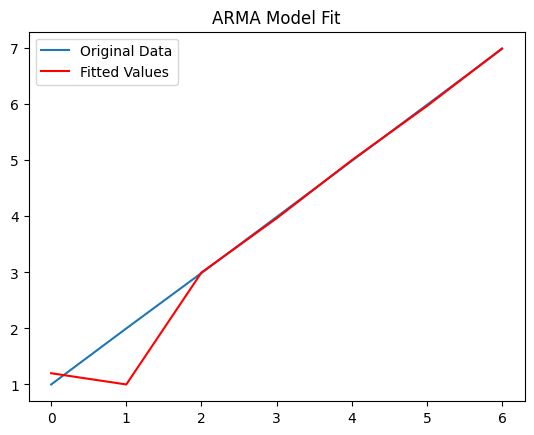

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948ADD030> 0.14869899426753147 0.9626735734471314


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  19.796
Date:                Wed, 05 Jun 2024   AIC                            -27.593
Time:                        15:42:58   BIC                            -27.917
Sample:                             0   HQIC                           -31.604
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7371      0.012    394.577      0.000       4.714       4.761
ar.L1          2.0000   6.66e-05      3e+04      0.000       2.000       2.000
ar.L2         -1.0000   2.87e-05  -3.48e+04      0

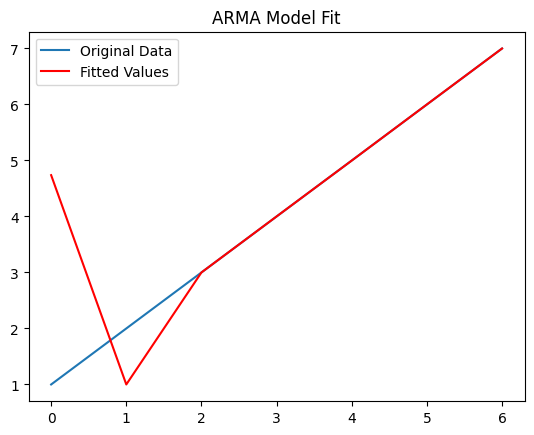

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D948EE48E0> 2.1383002395804698 0.4651118864022282


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  23.462
Date:                Wed, 05 Jun 2024   AIC                            -34.924
Time:                        15:42:58   BIC                            -32.014
Sample:                             0   HQIC                           -36.001
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4572     13.515      0.478      0.633     -20.031      32.946
ar.L1          1.9976      0.003    756.045      0.000       1.992       2.003
ar.L2         -0.9986      0.003   -338.777      0

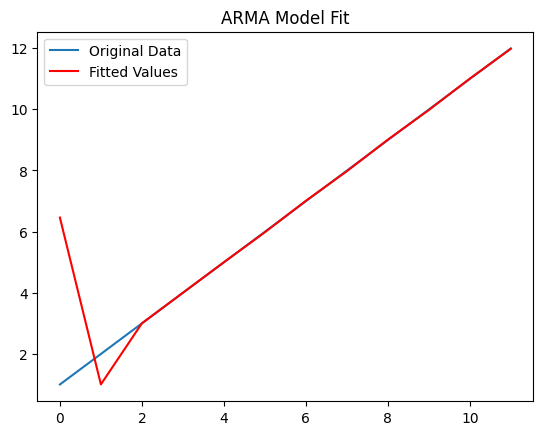

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9492BC9A0> 2.5643999535175688 0.7843345128354577


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  43.532
Date:                Wed, 05 Jun 2024   AIC                            -75.063
Time:                        15:42:59   BIC                            -71.674
Sample:                             0   HQIC                           -75.760
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9982     25.029      0.280      0.780     -42.058      56.054
ar.L1          1.9998      0.000   8696.397      0.000       1.999       2.000
ar.L2         -0.9999      0.000  -9298.467      0

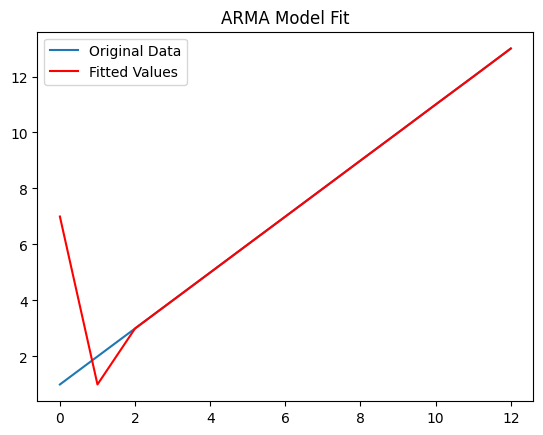

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9492A0670> 2.8451654519632843 0.7966894787636535


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  19.979
Date:                Wed, 05 Jun 2024   AIC                            -27.959
Time:                        15:42:59   BIC                            -23.710
Sample:                             0   HQIC                           -28.004
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8497      6.743      1.016      0.310      -6.367      20.066
ar.L1          1.9784      0.043     45.989      0.000       1.894       2.063
ar.L2         -0.9914      0.046    -21.322      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


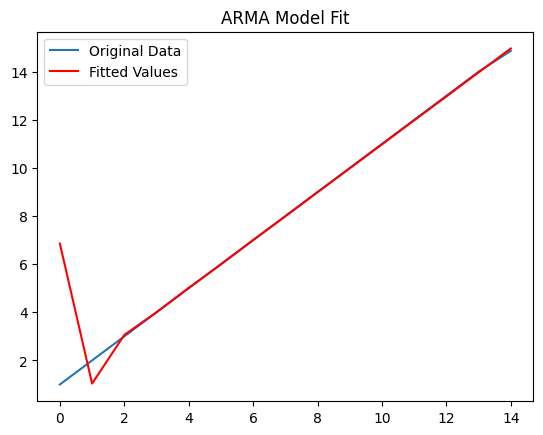

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9493388B0> 2.3456848769913226 0.8735051678503214
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   0.089
Date:                Wed, 05 Jun 2024   AIC                             11.822
Time:                        15:43:00   BIC                              9.479
Sample:                             0   HQIC                             5.533
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2168      6.256      0.674      0.500      -8.044      16.477
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


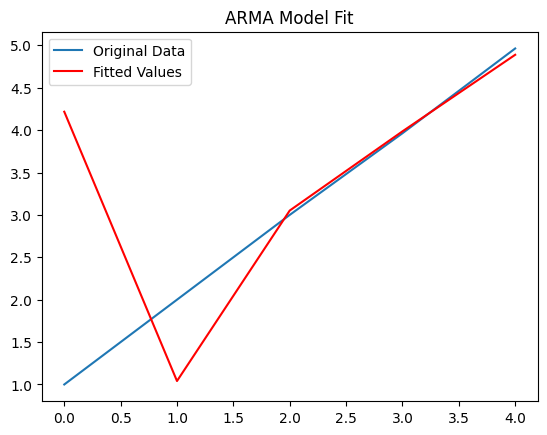

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9493393F0> 2.255425906115179 -0.15323541382212924
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  12.145
Date:                Wed, 05 Jun 2024   AIC                            -12.290
Time:                        15:43:00   BIC                             -8.455
Sample:                             0   HQIC                           -12.645
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8910      5.999      1.482      0.138      -2.867      20.649
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


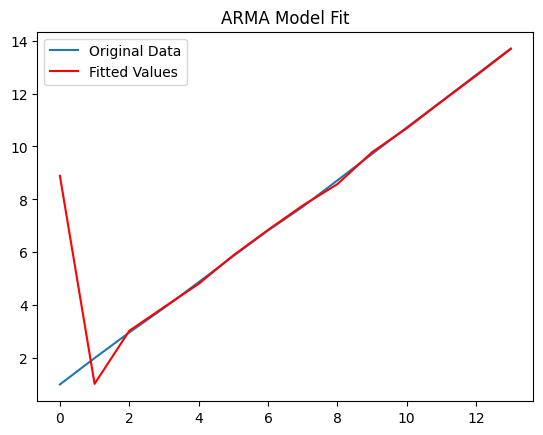

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9493383D0> 4.5183063036194 0.7069544846579423
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   5.135
Date:                Wed, 05 Jun 2024   AIC                              1.731
Time:                        15:43:01   BIC                              4.118
Sample:                             0   HQIC                             0.226
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8240     20.869      0.231      0.817     -36.079      45.727
ar.L1          

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


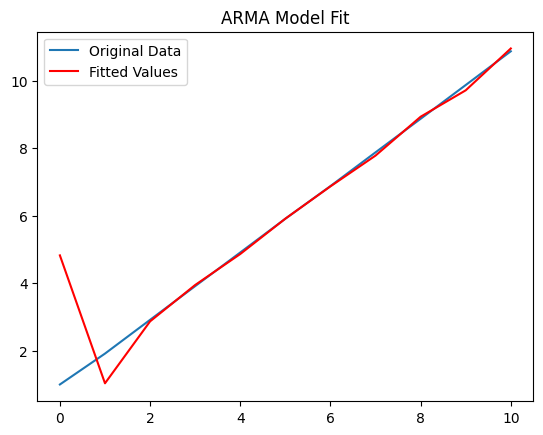

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D9492A1510> 1.4043036101154496 0.8567903919102094
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  -3.101
Date:                Wed, 05 Jun 2024   AIC                             18.202
Time:                        15:43:01   BIC                             24.177
Sample:                             0   HQIC                            19.369
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5927     22.174      0.478      0.633     -32.867      54.052
ar.L1       

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


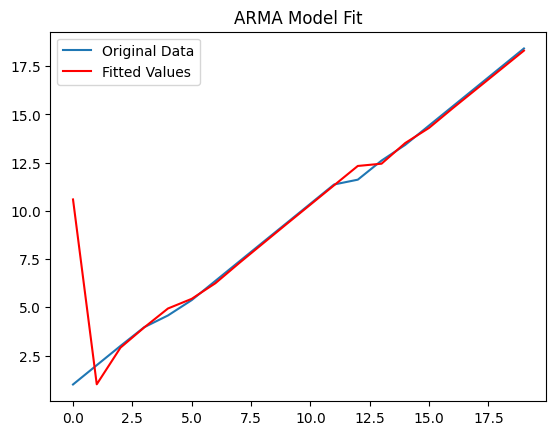

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949338610> 4.688927202006823 0.826656634919985
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   3.962
Date:                Wed, 05 Jun 2024   AIC                              4.075
Time:                        15:43:02   BIC                              0.393
Sample:                             0   HQIC                            -4.005
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4788    8.5e-14   2.91e+13      0.000       2.479       2.479
ar.L1         

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


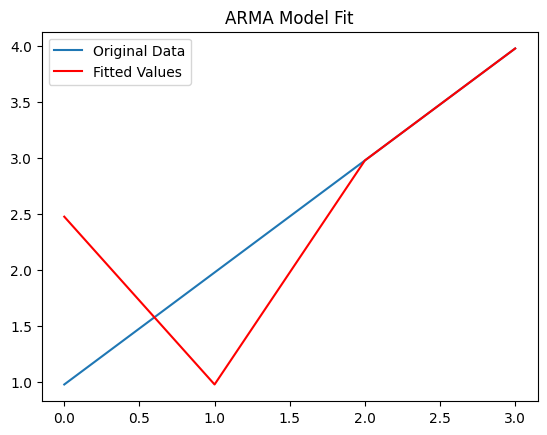

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94909F0A0> 0.8112144357932323 0.35101826089677124
1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   3.522
Date:                Wed, 05 Jun 2024   AIC                              4.957
Time:                        15:43:02   BIC                              1.274
Sample:                             0   HQIC                            -3.124
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5116      0.101     24.805      0.000       2.313       2.710
ar.L1      

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


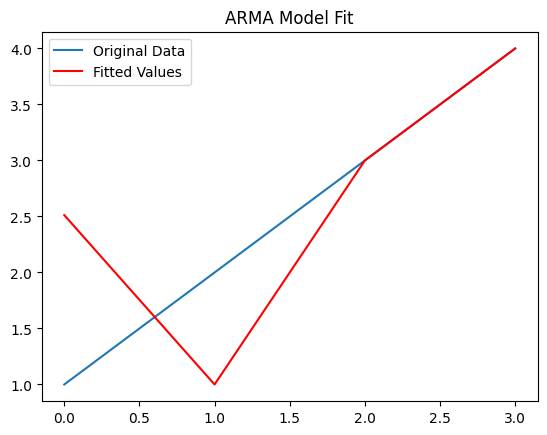

<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D949299C00> 0.8215578206696227 0.3426702906171363


e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   6.420
Date:                Wed, 05 Jun 2024   AIC                             -0.839
Time:                        15:43:03   BIC                             -2.089
Sample:                             0   HQIC                            -5.841
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8634      3.295      1.476      0.140      -1.595      11.321
ar.L1          1.9802      0.047     42.063      0.000       1.888       2.073
ar.L2         -0.9979      0.007   -142.903      0

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


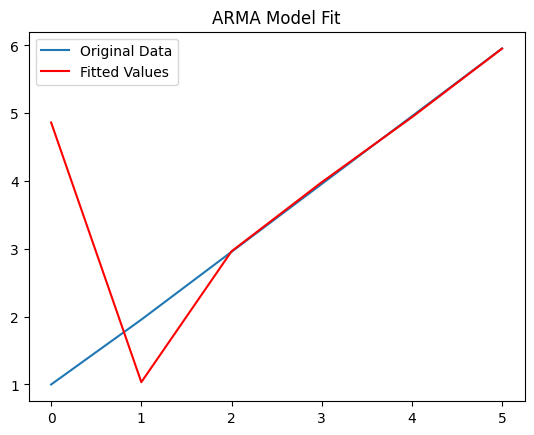

e:\MyDocument\Codes\_notpad\llmFlight\Scripts\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001D94933A6E0> 2.6306925346626397 0.086641499941159


KeyboardInterrupt: 

In [6]:
# 单进程
from emotional_coherence import main
df_need[model] = df_need['text'].apply(lambda row: json.dumps(main(row)))

In [6]:
# 多进程
import json
from emotional_coherence import main
from joblib import Parallel, delayed

def process_row(row):
    return json.dumps(main(row))

# 使用 joblib 进行并行计算
results = Parallel(n_jobs=-1)(delayed(process_row)(row) for row in df_need['text'])

# 将计算结果赋值回 DataFrame
df_need[model] = results


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [29]:
indexer = df_need.index
df.loc[indexer] = df_need
df[df.columns[8:]]

text  \
0    深度学习是一种机器学习的方法，它通过模拟人类神经网络的结构和功能来实现对数据的学习和预测。在...   
1    深度学习作为一种机器学习方法，其本质是通过神经网络来实现对数据的学习和模式识别。尽管深度学习...   
2    深度学习并没有脱离数学，相反，数学在深度学习中扮演着非常重要的角色。深度学习是建立在数学基础...   
3    深度学习是一门需要深厚理论基础和丰富实践经验的学科，纯靠造假是无法取得真正的科研成果和发表高...   
4    不应该仅仅依靠造假来发表论文。虽然有些人可能会通过欺骗和伪造数据来发表论文，但这种行为是极其...   
..                                                 ...   
319  鸿蒙系统是华为公司自行研发的操作系统，它与安卓系统有所不同，虽然两者都是基于Linux内核开...   
320  鸿蒙系统和安卓系统是两个不同的操作系统。鸿蒙系统是由华为公司自主研发的操作系统，旨在为物联网...   
321  关于黑人需要混几代血才能接近白人肤色这个问题，首先我认为肤色并不是衡量一个人价值和身份的标准...   
322  种族和肤色并不代表一个人的性格和人性，每个人都有自己独特的特质和价值，不应该用肤色来衡量一个...   
323  黑人需要混合多代不同种族的血统才能逐渐接近白人肤色，但这并不意味着黑人需要放弃或改变他们的种...   

                                text-embedding-3-small  \
0    [-0.03873550891876221, -0.03209991380572319, 0...   
1    [-0.03281135484576225, -0.04714532196521759, 0...   
2    [-0.05262744054198265, -0.041652824729681015, ...   
3    [0.05532760173082352, -0.00803462602198124, 0....   
4    [0.07378417253494263, -0.026973411440849304, 0...   
..                                                 ...   
319  [0.009668500162661076, 0.00952873844653368, 0....   
320  [-0.012859110720455647, 0.021412188187241554, ...   
321  [0.06337092816829681, -0.013654569163918495, 0...   
322  [0.05830851197242737, 0.0020467150025069714, 0...   
323  [0.04827204719185829, 0.01748865656554699, 0.0...   

                 sentences_length[mean1,cv1,mean2,cv2]  \
0    [41.611111111111114, 0.25685931847790017, 14.3...   
1    [43.642857142857146, 0.3040535969520589, 16.36...   
2    [47.2, 0.22277015979821888, 13.176470588235293...   
3    [43.36363636363637, 0.28333703678015437, 15.26...   
4    [34.5, 0.4222841241835787, 16.75, 0.2248734204...   
..                                                 ...   
319  [50.18181818181818, 0.3370928507134205, 14.638...   
320  [35.333333333333336, 0.43621237817724123, 17.1...   
321  [36.1764705882353, 0.35554398817855076, 13.044...   
322  [32.4, 0.38776046356887434, 10.928571428571429...   
323  [39.333333333333336, 0.17409015749300114, 19.1...   

                 words_richness[ttr, yules_k, d_index]  \
0    [0.33986928104575165, 235.04729899706192, 0.08...   
1    [0.4383561643835616, 172.49014824544943, 0.137...   
2    [0.5179856115107914, 220.4854821179028, 0.2460...   
3    [0.5083056478405316, 160.0423836381497, 0.1719...   
4    [0.6547619047619048, 167.23356009070295, 0.415...   
..                                                 ...   
319  [0.4646153846153846, 150.53254437869822, 0.169...   
320  [0.711864406779661, 143.63688595231255, 0.5412...   
321  [0.34146341463414637, 207.49553837001784, 0.10...   
322  [0.5922330097087378, 201.71552455462344, 0.324...   
323  [0.6712328767123288, 157.62807280915743, 0.464...   

                             emotion_Dou[eps, eiv]  
0        [-0.99242573436361, 0.013853045618768956]  
1      [-0.9971031135266845, 0.003428978282686927]  
2    [-0.9999971667189304, 2.2681937399698345e-06]  
3       [-0.9096644141027803, 0.12414851826658714]  
4       [-0.7869503595847821, 0.07258366418451918]  
..                                             ...  
319     [-0.7812304893657067, 0.07706697231436901]  
320       [-0.91433732588865, 0.08247039458465749]  
321     [-0.7865466427458667, 0.15192894312026786]  
322     [-0.6353338957089568, 0.02992310353455195]  
323    [-0.9898447708271082, 0.014347364137388394]  

[324 rows x 5 columns]

In [30]:
time_str = time.strftime('%Y-%m-%d-%H-%M-%S', time.localtime())
os.rename(file, '../../dataset/history/' + file + '-' + time_str + '.csv')
df.to_csv(file, encoding='utf-8-sig')